In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data_loaders import model_names
from data_loaders import load_ens
from data_loaders import load_nature

from calpycles.enkf_calibration import EnKFcalibration
from calpycles.plotting.ens_obs import plot_ens_obs
from calpycles.DYCOMS_RF01.measurements import MeasurementsDYCOMS_RF01

Using custom matplotlib style from 'mplstyle' file


In [ ]:
### CHANGE MEAS DATA

meas = MeasurementsDYCOMS_RF01()
ds = meas.data

meas_name = "ZBASE"

# print(ds)
# plot_ens_obs(
#     [],
#     [],
#     meas,
#     # nature=nature,
#     # nature_name="Nature",
#     save_file="fig-tmp",
#     cloud_height_type="mean",
# )

# Higher ww, www var -> stabilize lowres, num
meas.modify_var_profile(name="w_mean2", std_factor=4)
meas.modify_var_profile(name="w_mean3", std_factor=4)

# Lower cloud base var -> fix weno
meas.modify_var_ts(
    std_factors = {
        "ztoph": 1,
        "ztopr": 1,
        "zbaseh": 1/4,  ### JUST REDUCE VAR FOR BASE HEIGHT TO FORCE FIT
        "zbaser": 1,
    }
)

In [4]:
# run and plot DA WITH MODIFIED DATA
from calpycles.enkf_calibration import get_data
y, hnoise = get_data(meas=meas)

from data_loaders import model_names

ensembles = {
    model_name: load_ens(model_name) for model_name in model_names
}

DAs = {
    model_name: EnKFcalibration(
        ensembles[model_name],
        y.copy(), # modified 
        hnoise, # modified
        plot_folder = f"figs/{model_name}/REAL_{meas_name}/",
        # name = "",
    ) for model_name in model_names
}

Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.
Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_LOWRES/DYCOMS_RF01_N64/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64...
... done loading samples for ensemble DYCOMS_RF01_N64.
Loaded observation DYCOMS_RF01_N64 from ./data/WENO_LOWRES/DYCOMS_RF01_N64/samples_observations.nc.
Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/MIXED_FULLRE

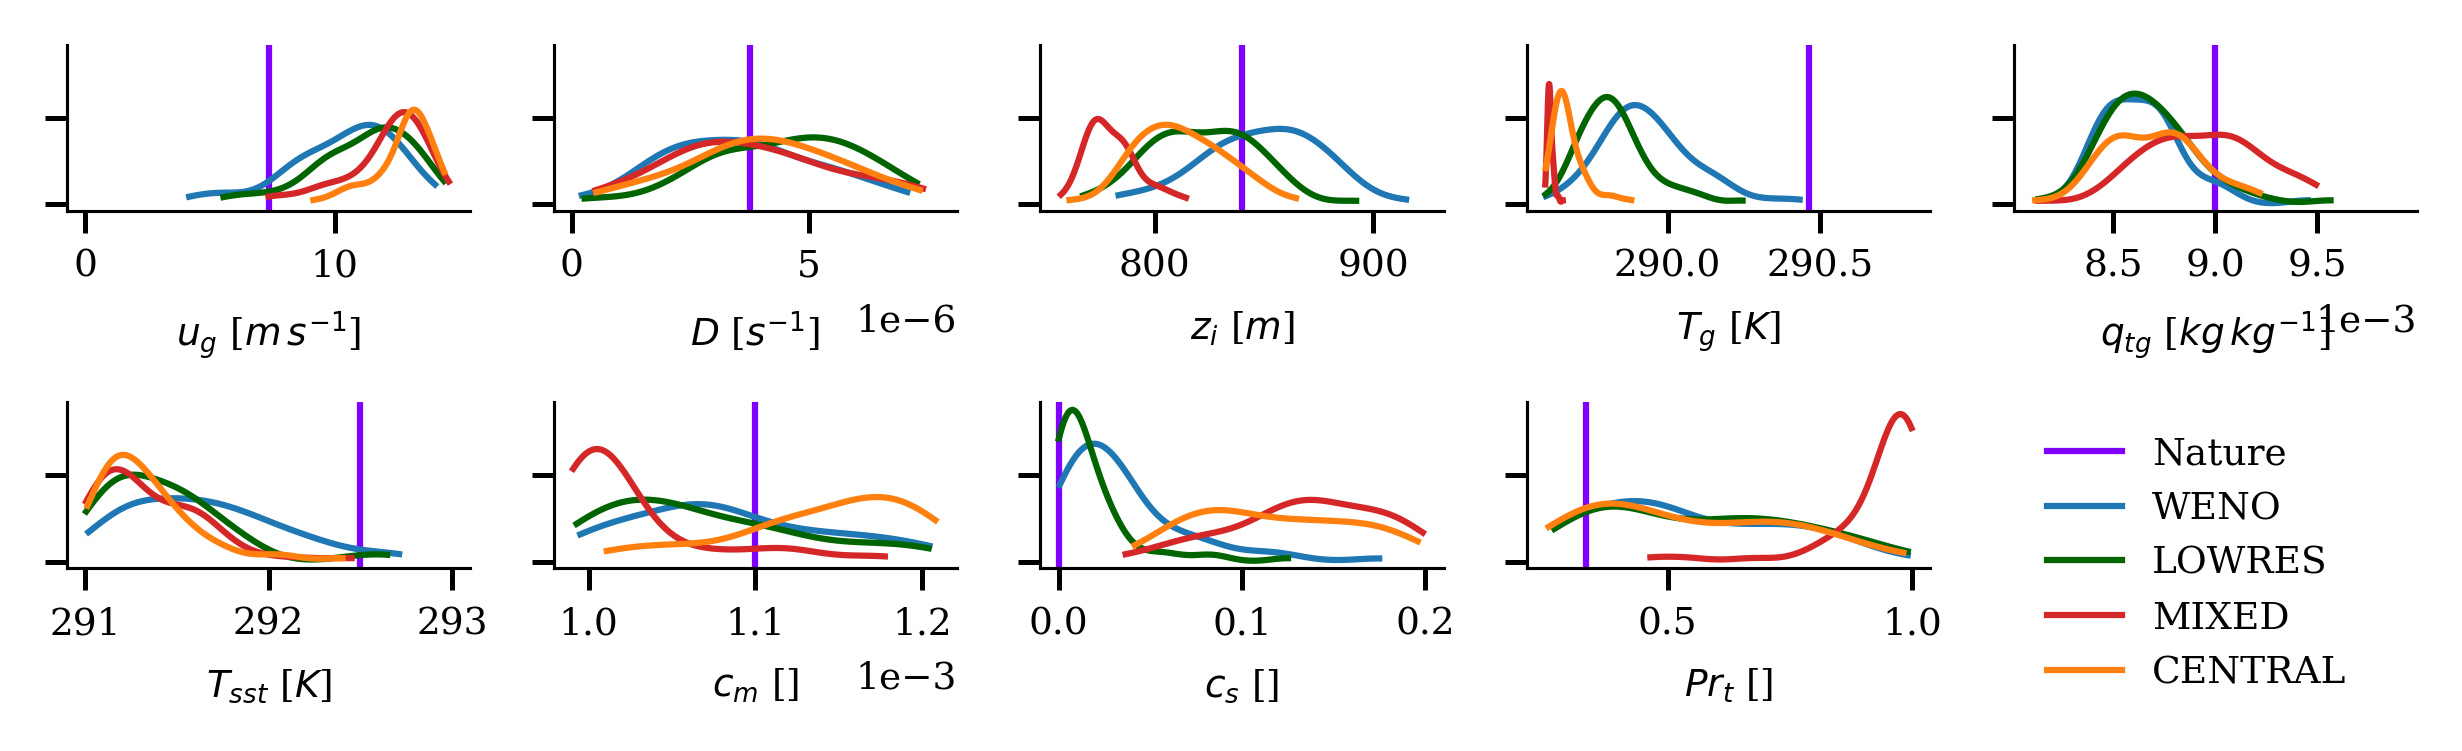

Saved figure  figs/dists_1d_REAL_ZBASE-LOW-W/fig-dist1d_num_res_constrained


In [8]:
# plot comparison of all new runs # from plot_EnKF_comparisons.ipynb

from calpycles.plotting.distributions import plot_samples_1d
from calpycles.parameters import ParametersDYCOMS_RF01 
PARAMS = ParametersDYCOMS_RF01()

from calpycles.plotting import COLORS
C_PRIOR = COLORS[0]
C_WENO_FULLRES = COLORS[1]
C_MIXED = COLORS[2]
C_CENTRAL = COLORS[3]
C_WENO_LOWRES = COLORS[4]
C_WENO_FULLRES_SYNTH = COLORS[5]

DA_list = DAs 

# res+num
plot_samples_1d(
    [
        DA_list["WENO_FULLRES"].analysis(constrained=True),
        DA_list["WENO_LOWRES"].analysis(constrained=True),
        DA_list["MIXED_FULLRES"].analysis(constrained=True),
        DA_list["CENTRAL_FULLRES"].analysis(constrained=True),
    ],
    [
        "WENO",
        "LOWRES",
        "MIXED",
        "CENTRAL",
    ],
    colors = [
        C_WENO_FULLRES,
        C_WENO_LOWRES,
        C_MIXED,
        C_CENTRAL,
    ],
    nature_params=PARAMS.defaults,
    do_samples=False,
    save_file=f"figs/dists_1d_REAL_{meas_name}/fig-dist1d_num_res_constrained",
    lims="constrained",
)

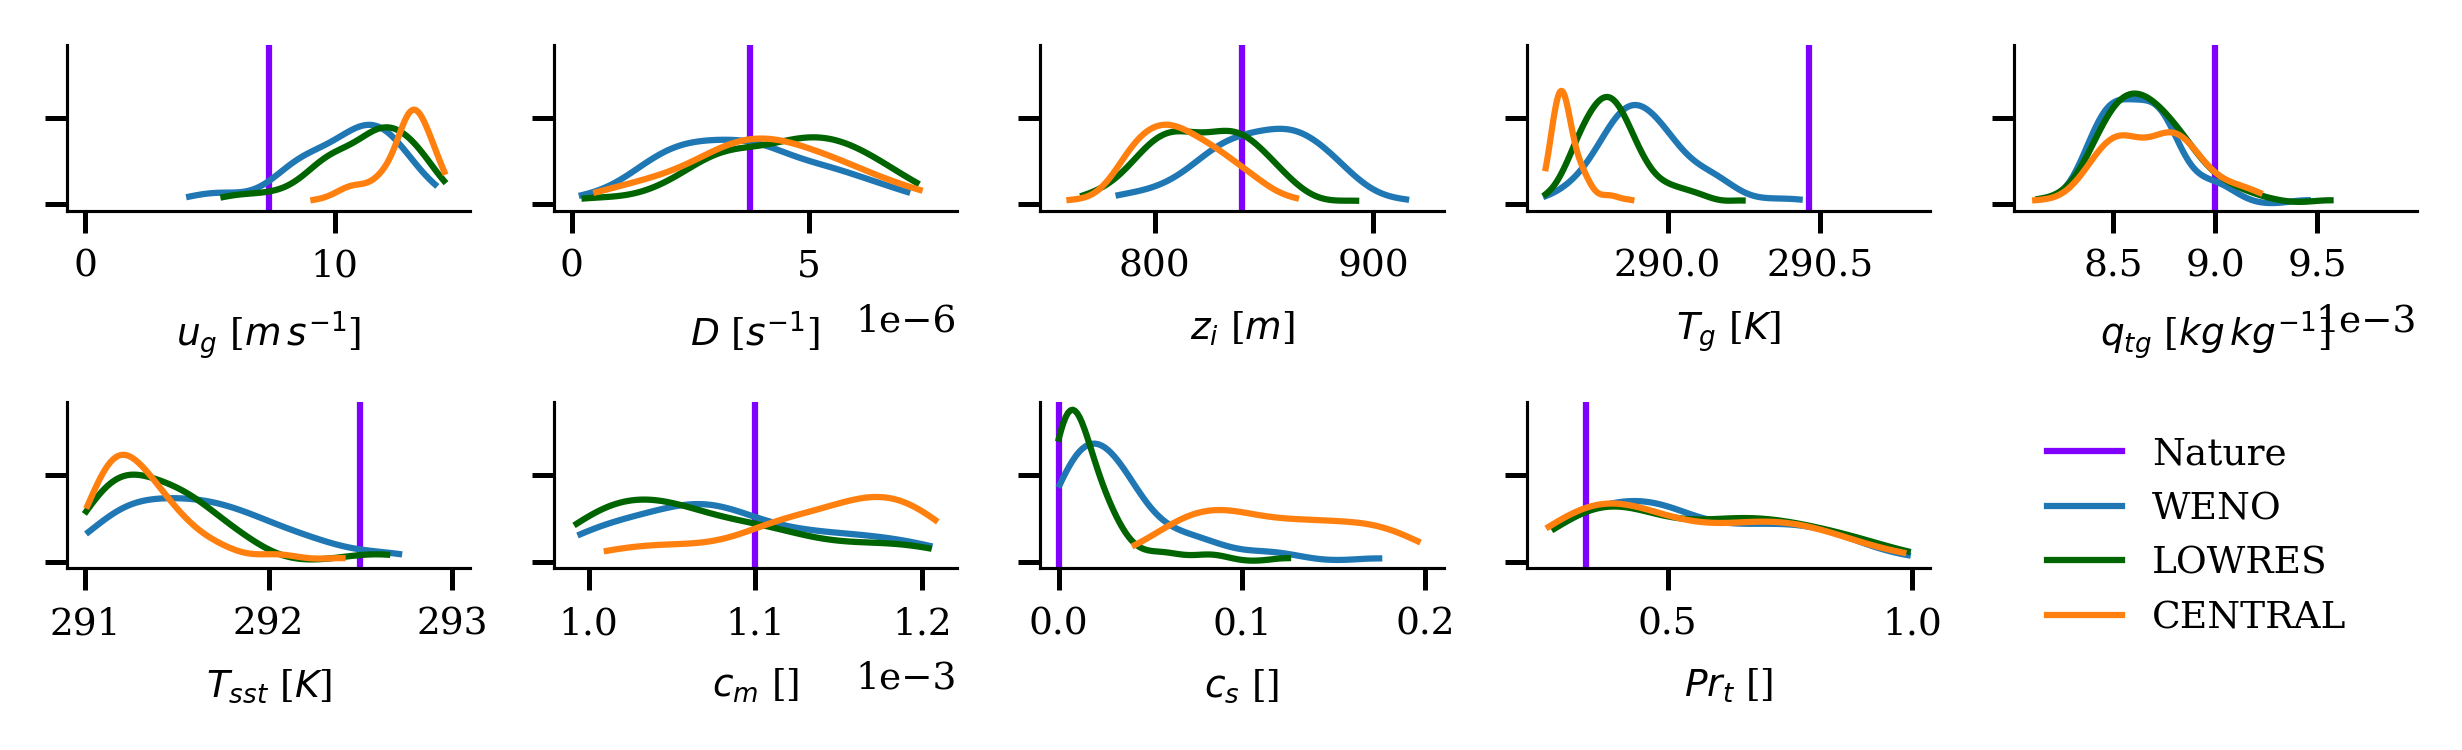

Saved figure  figs/dists_1d_REAL_ZBASE-LOW-W/fig-dist1d_num_res_noMIXED_constrained


In [5]:
# plot comparison of all new runs # from plot_EnKF_comparisons.ipynb

from calpycles.plotting.distributions import plot_samples_1d
from calpycles.parameters import ParametersDYCOMS_RF01 
PARAMS = ParametersDYCOMS_RF01()

from calpycles.plotting import COLORS
C_PRIOR = COLORS[0]
C_WENO_FULLRES = COLORS[1]
C_MIXED = COLORS[2]
C_CENTRAL = COLORS[3]
C_WENO_LOWRES = COLORS[4]
C_WENO_FULLRES_SYNTH = COLORS[5]

DA_list = DAs 

# res+num
plot_samples_1d(
    [
        DA_list["WENO_FULLRES"].analysis(constrained=True),
        DA_list["WENO_LOWRES"].analysis(constrained=True),
        # DA_list["MIXED_FULLRES"].analysis(constrained=True),
        DA_list["CENTRAL_FULLRES"].analysis(constrained=True),
    ],
    [
        "WENO",
        "LOWRES",
        # "MIXED",
        "CENTRAL",
    ],
    colors = [
        C_WENO_FULLRES,
        C_WENO_LOWRES,
        # C_MIXED,
        C_CENTRAL,
    ],
    
    nature_params=PARAMS.defaults,
    do_samples=False,
    save_file=f"figs/dists_1d_REAL_{meas_name}/fig-dist1d_num_res_noMIXED_constrained",
    lims="constrained",
)

WENO_FULLRES


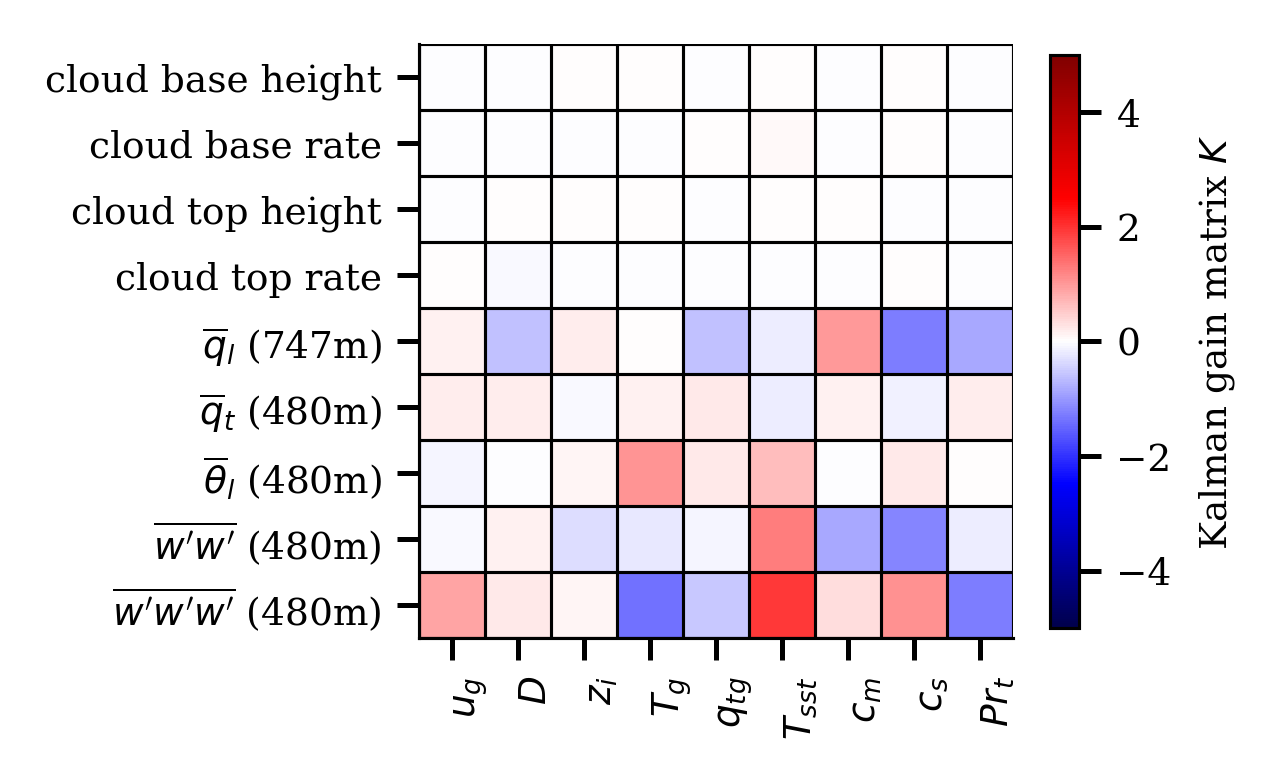

Saved figure  figs/WENO_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__K


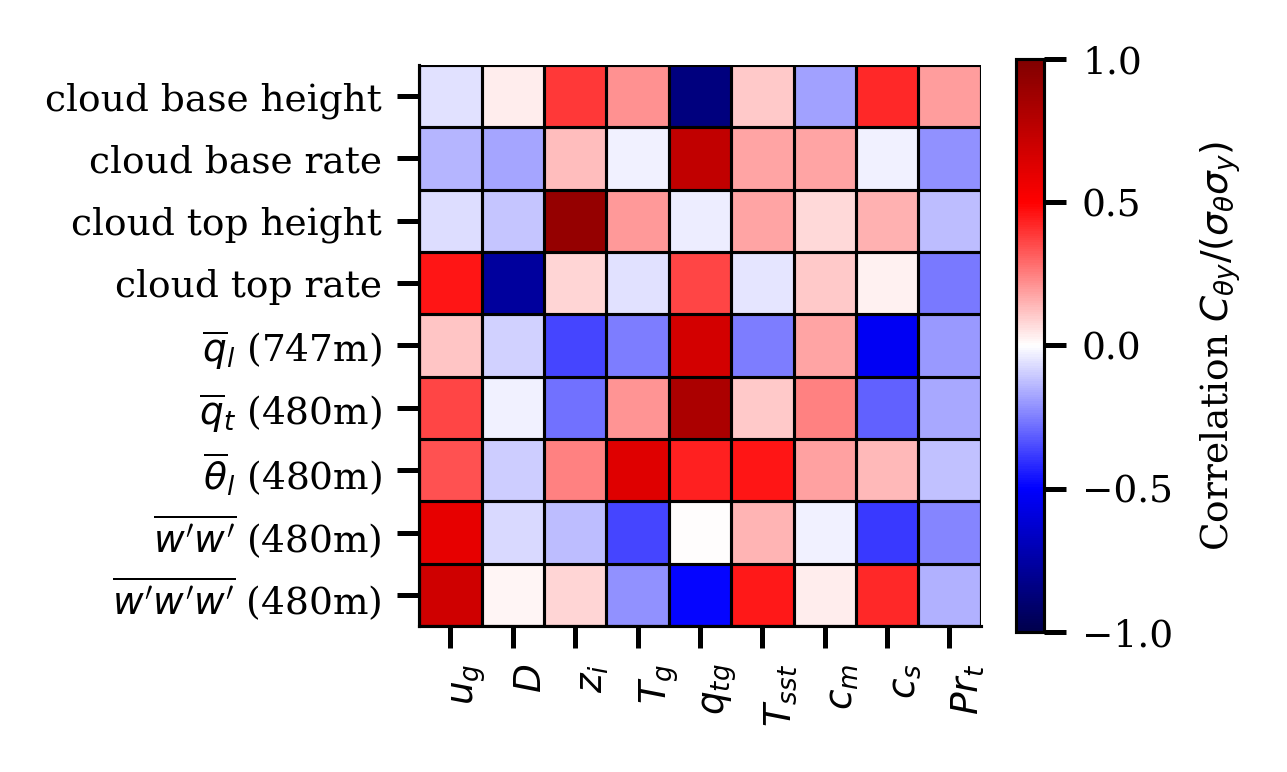

Saved figure  figs/WENO_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__Corr_xy


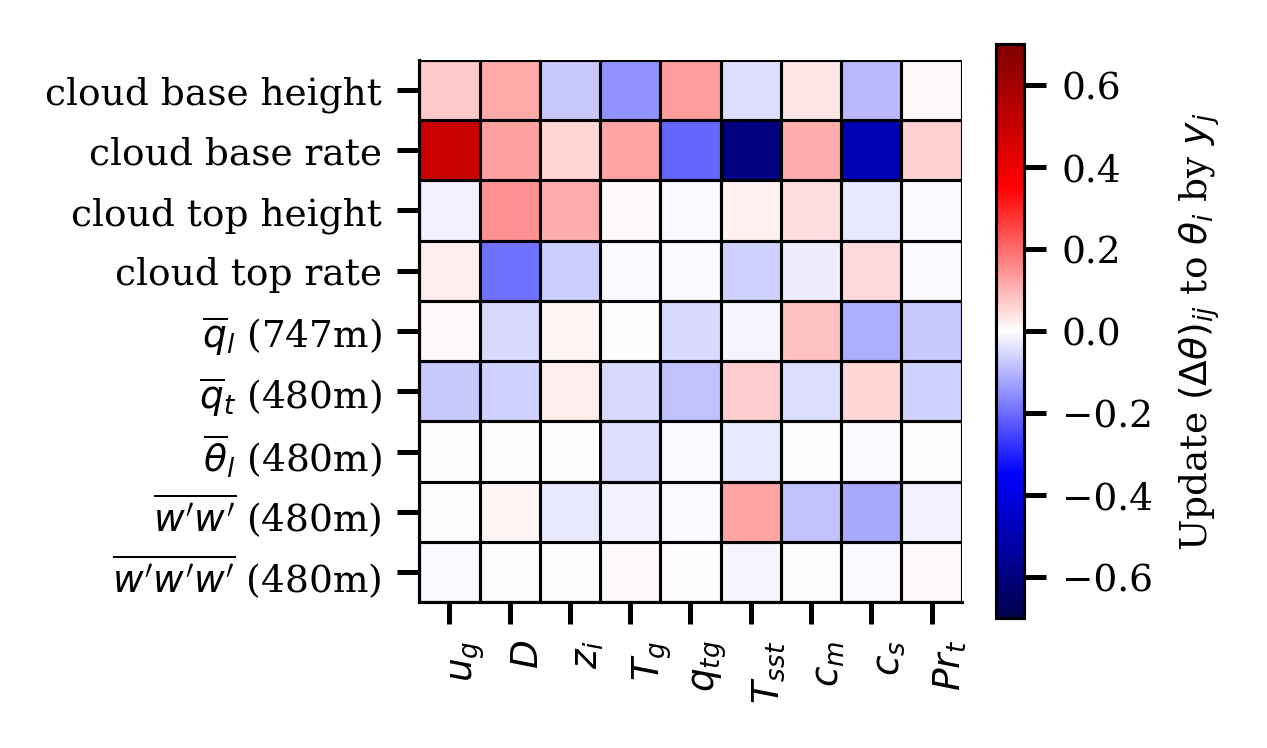

Saved figure  figs/WENO_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__partial_updates


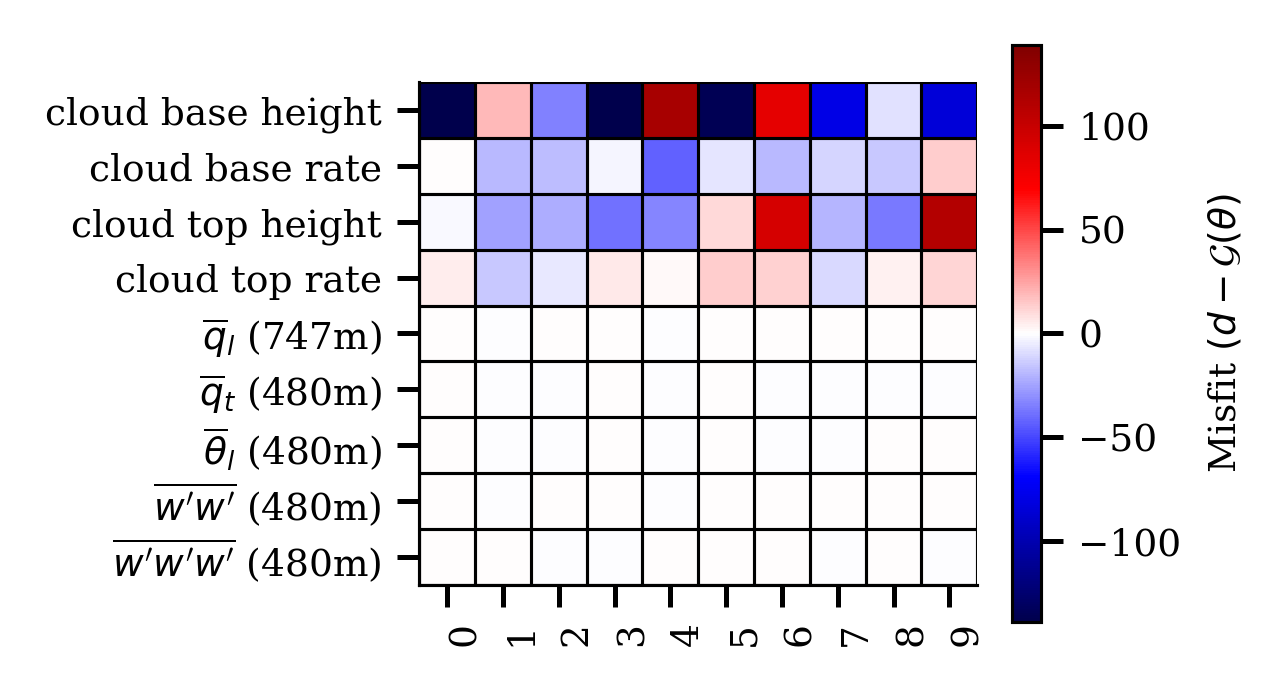

Saved figure  figs/WENO_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__misfit


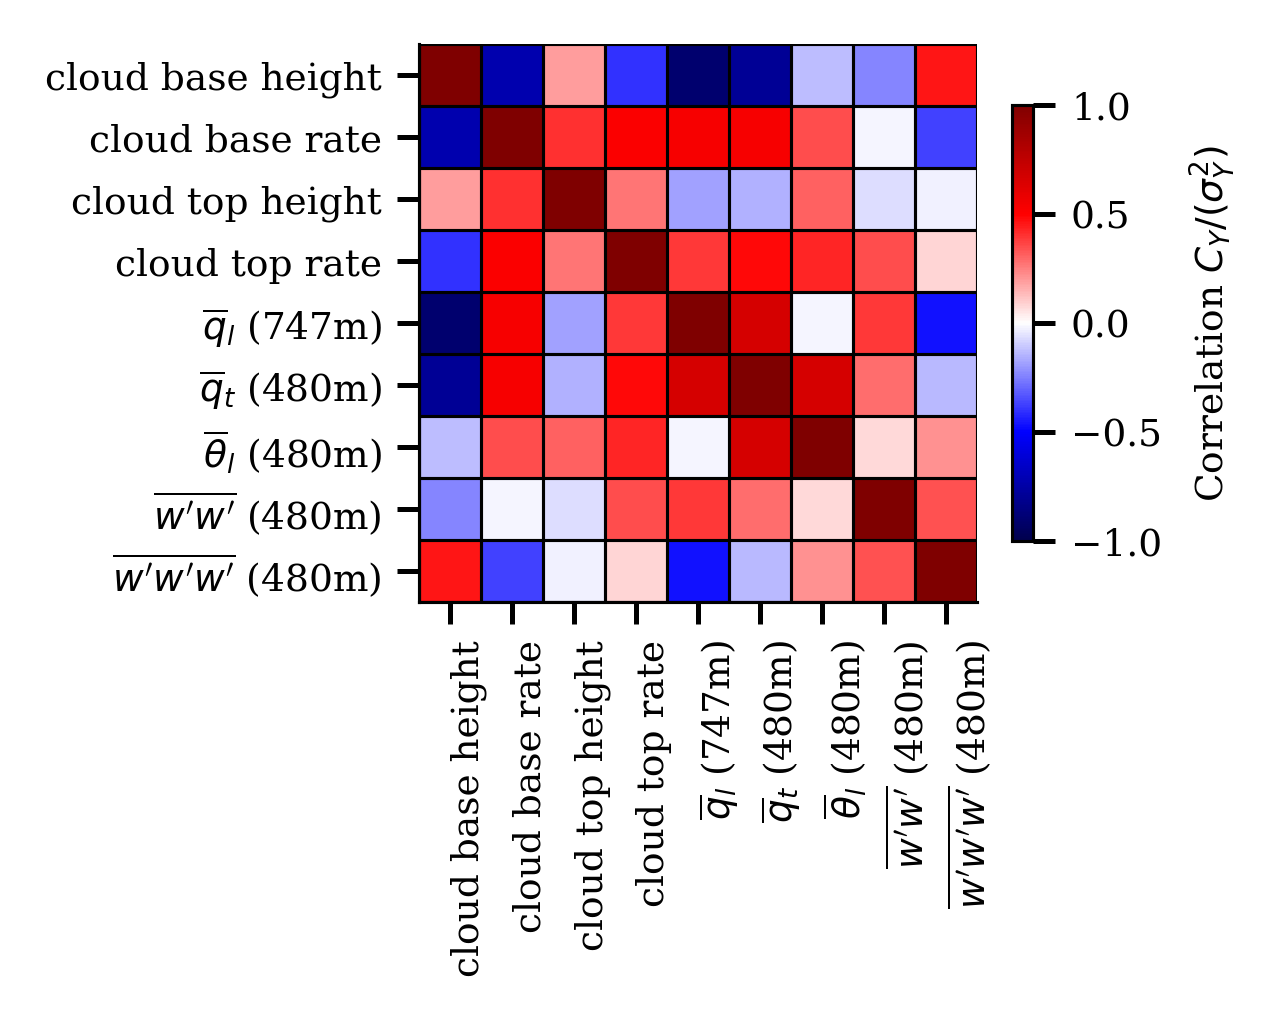

Saved figure  figs/WENO_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__Corr_y


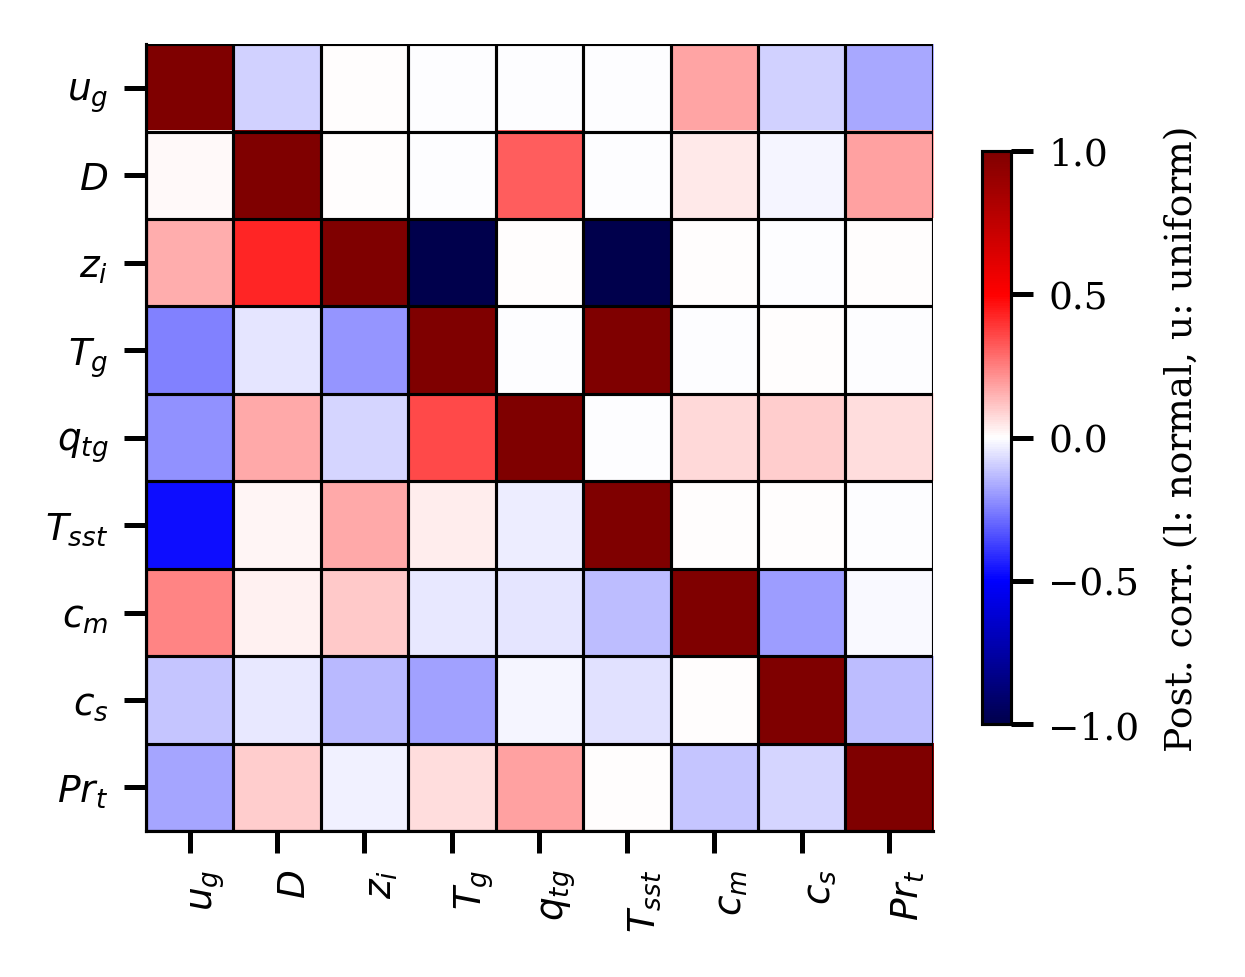

Saved figure  figs/WENO_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__post_corr_transform
WENO_LOWRES


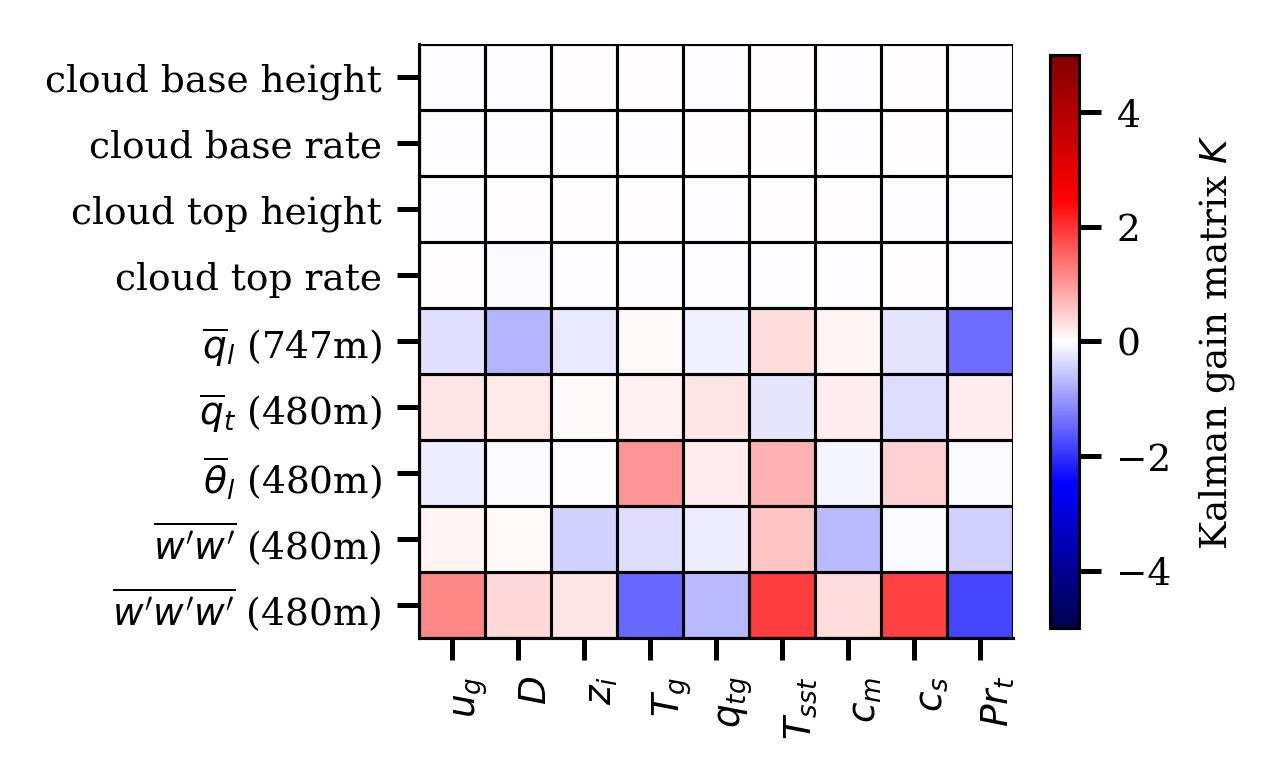

Saved figure  figs/WENO_LOWRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__K


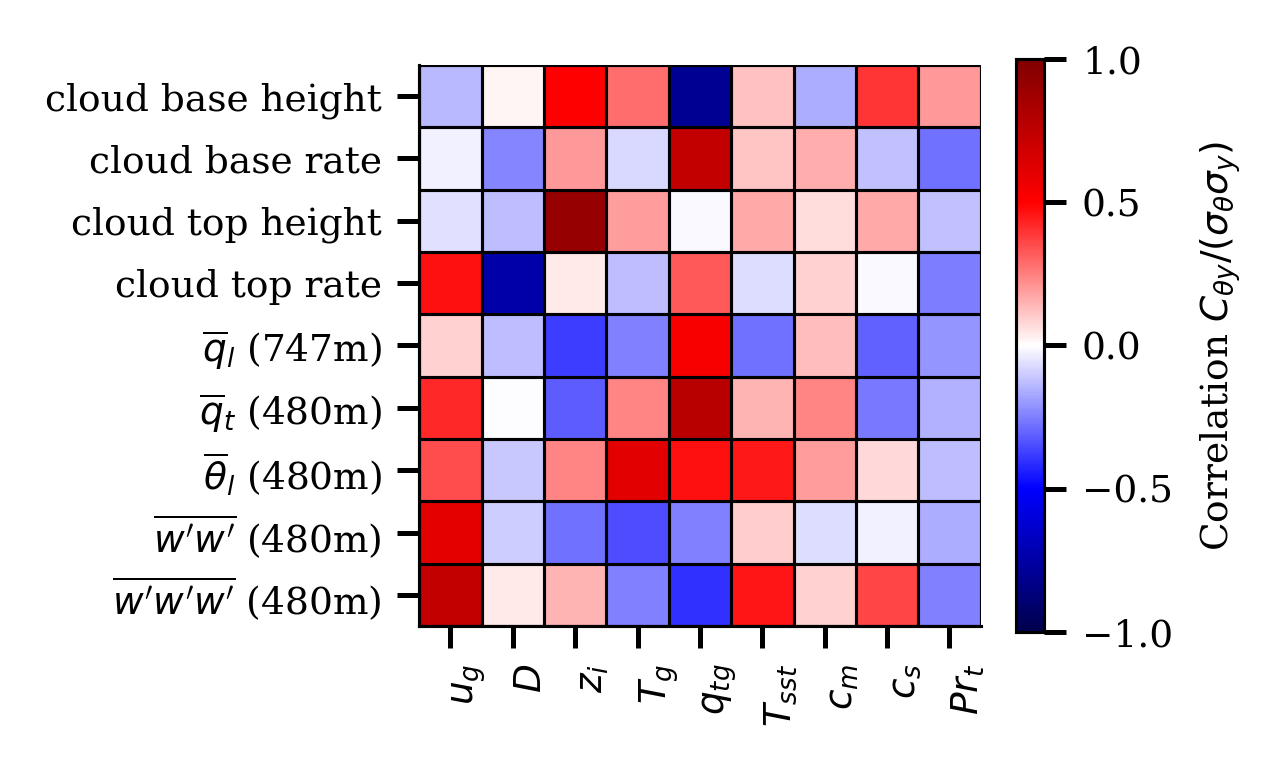

Saved figure  figs/WENO_LOWRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__Corr_xy


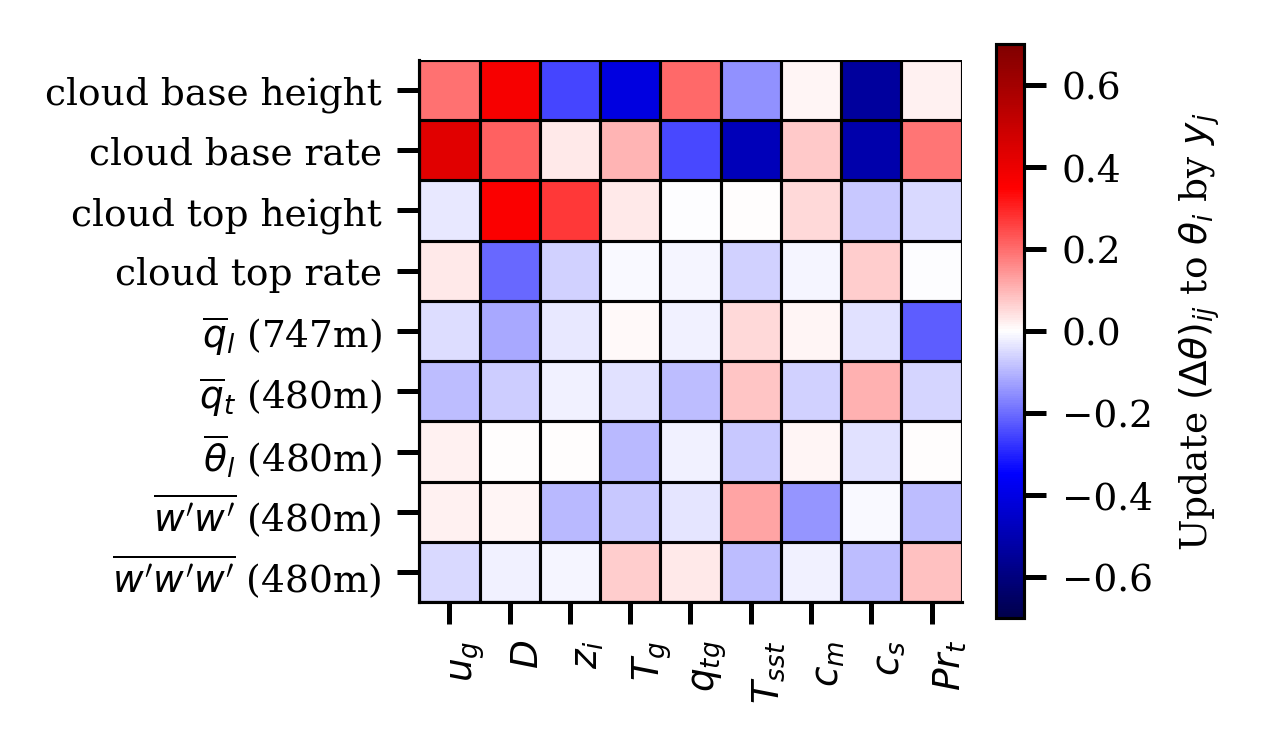

Saved figure  figs/WENO_LOWRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__partial_updates


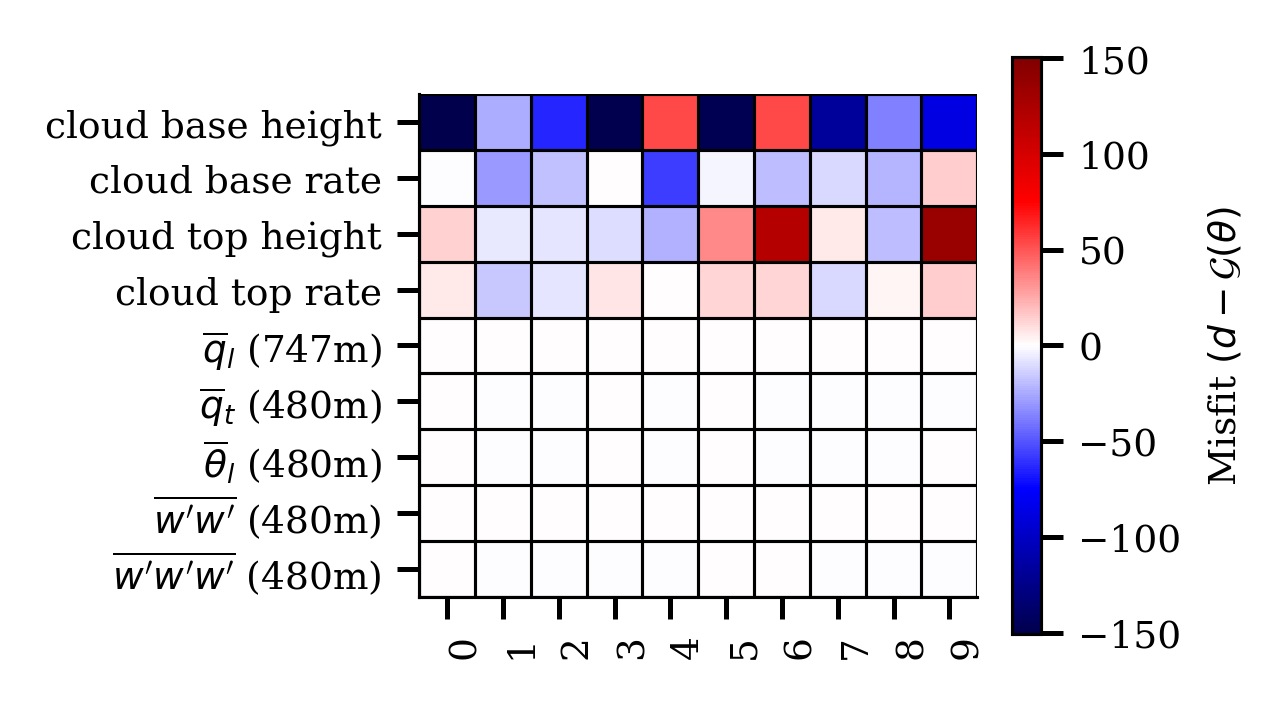

Saved figure  figs/WENO_LOWRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__misfit


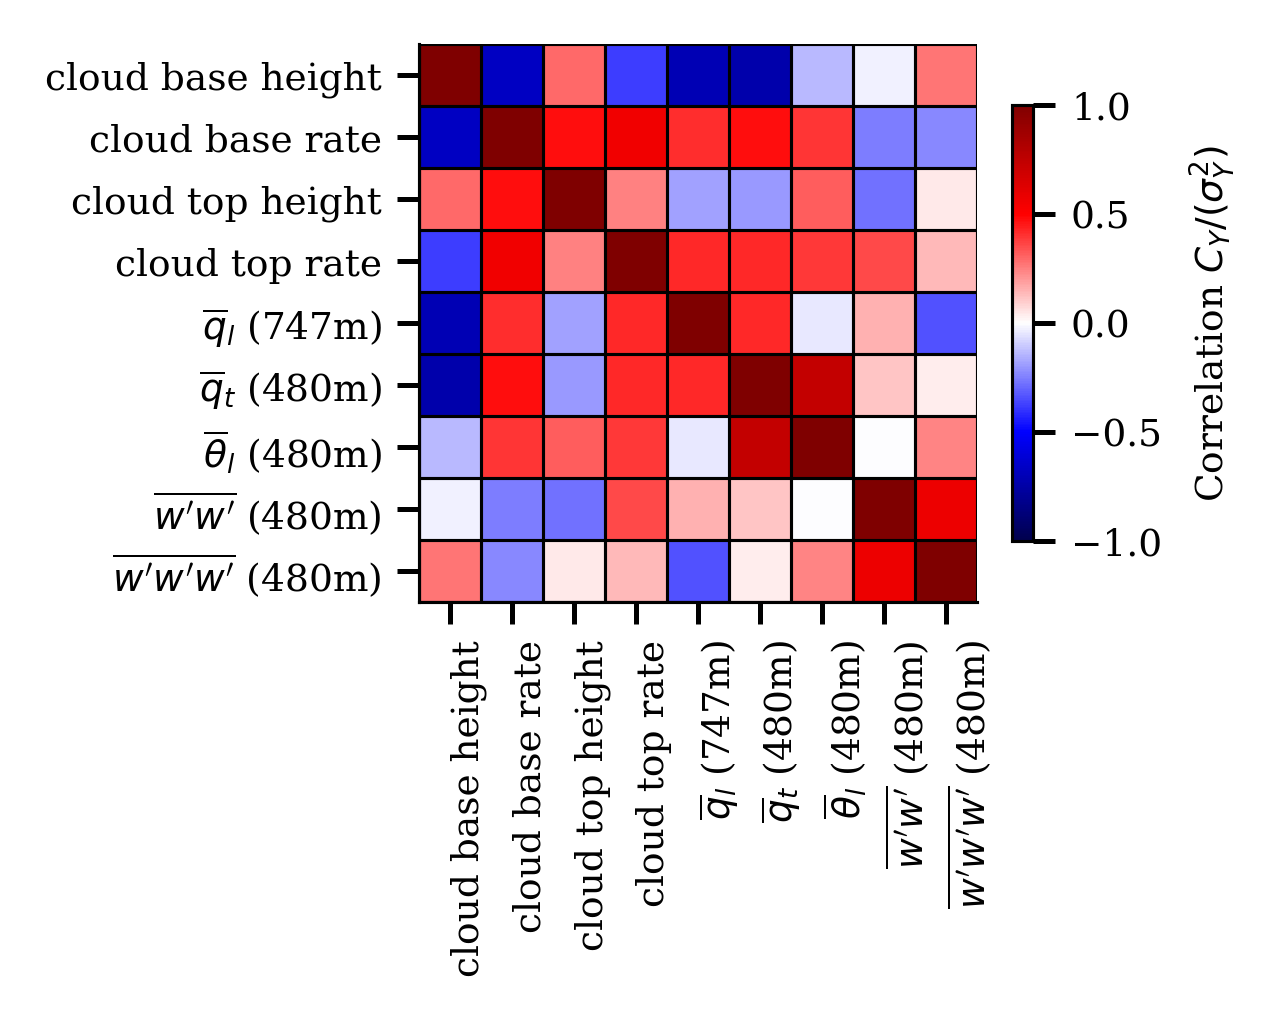

Saved figure  figs/WENO_LOWRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__Corr_y


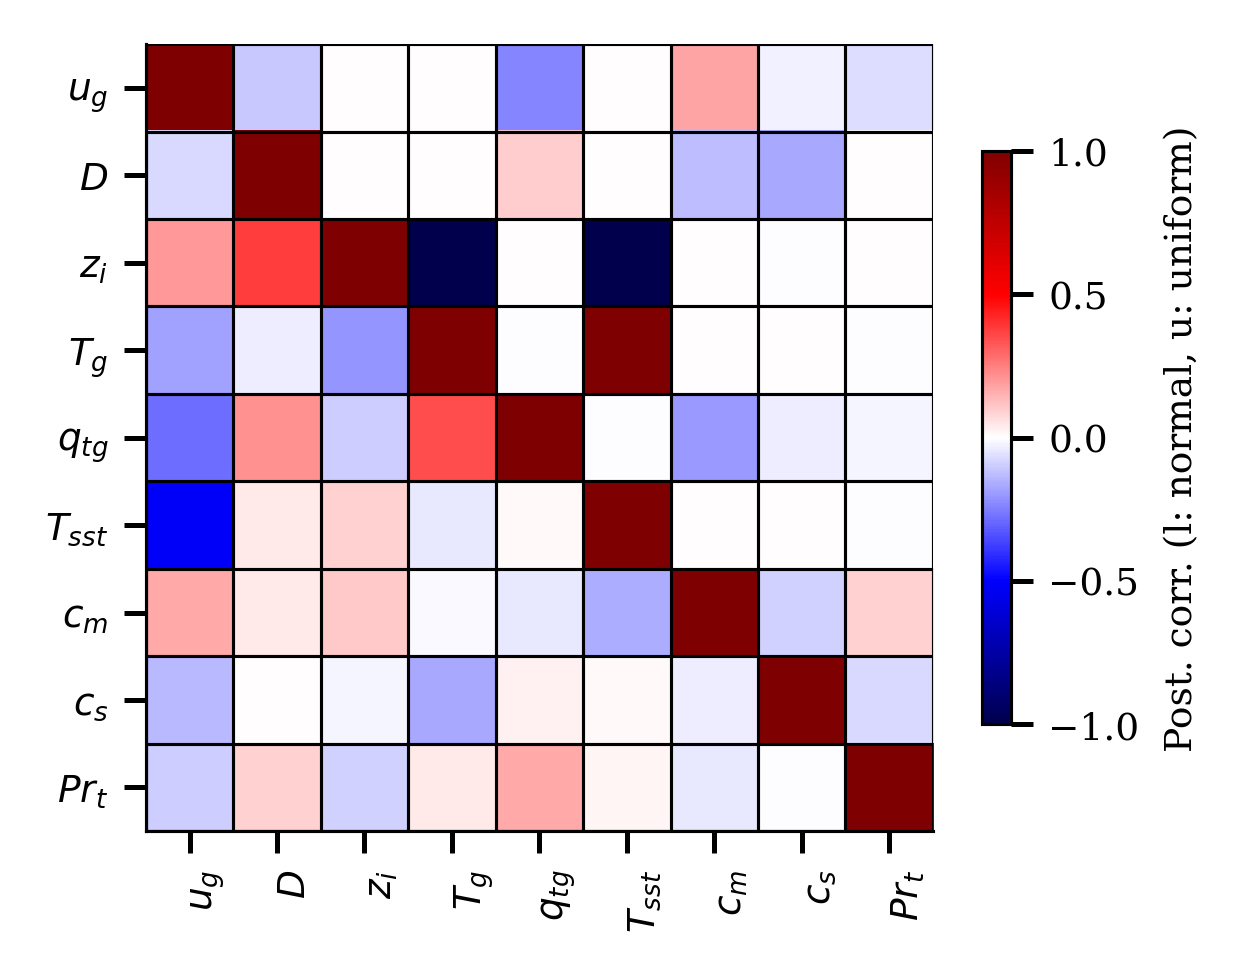

Saved figure  figs/WENO_LOWRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__post_corr_transform
MIXED_FULLRES


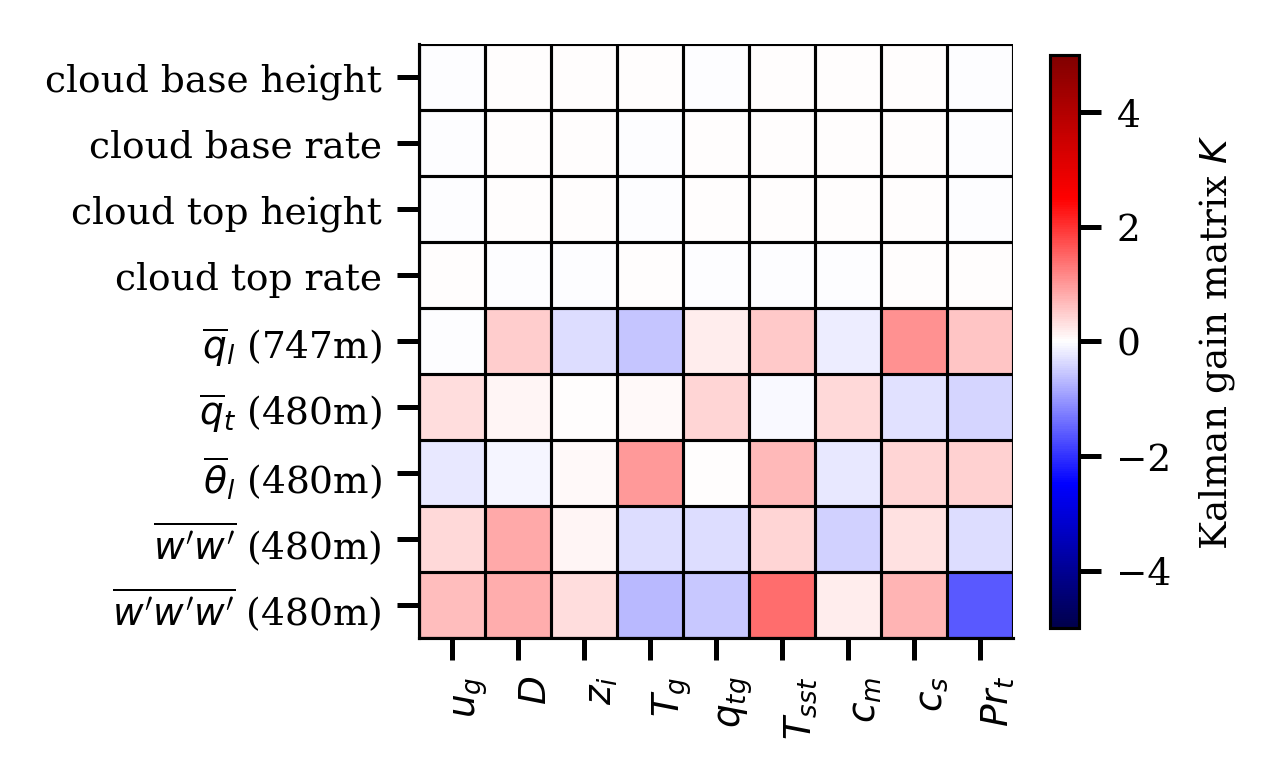

Saved figure  figs/MIXED_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__K


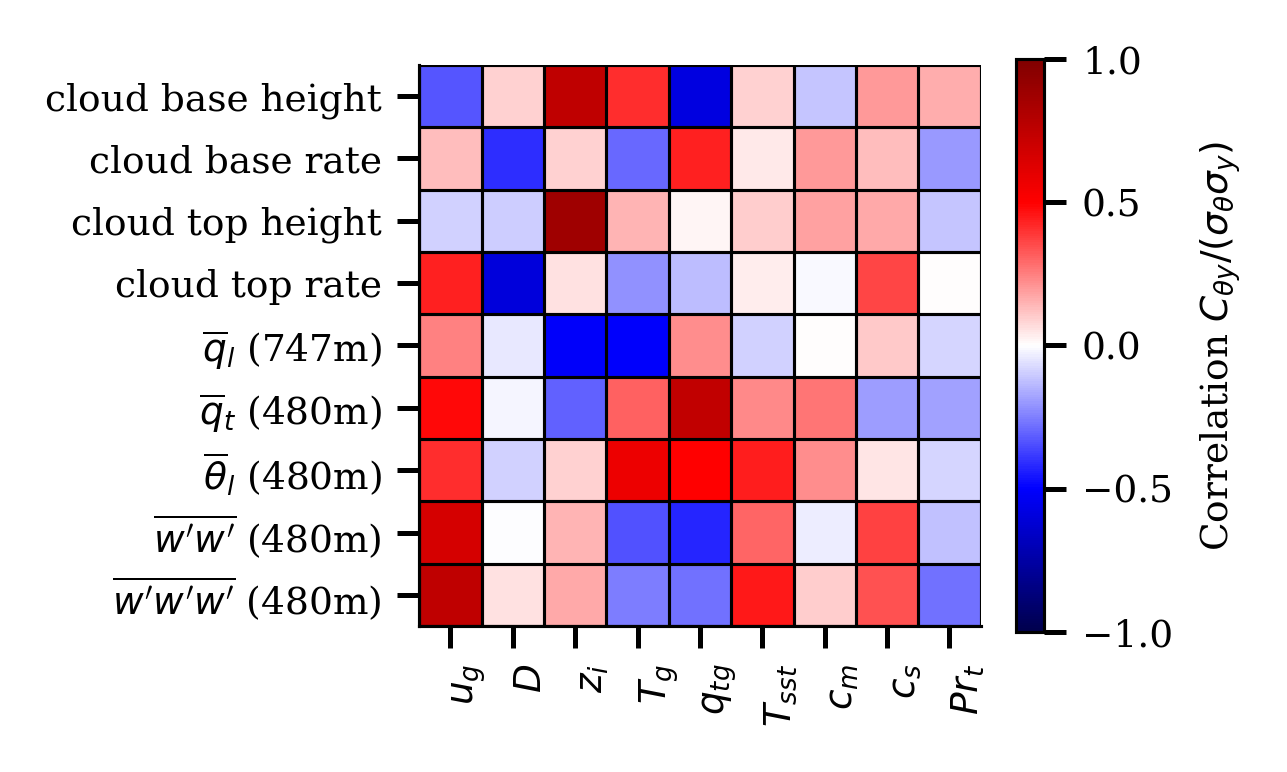

Saved figure  figs/MIXED_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__Corr_xy


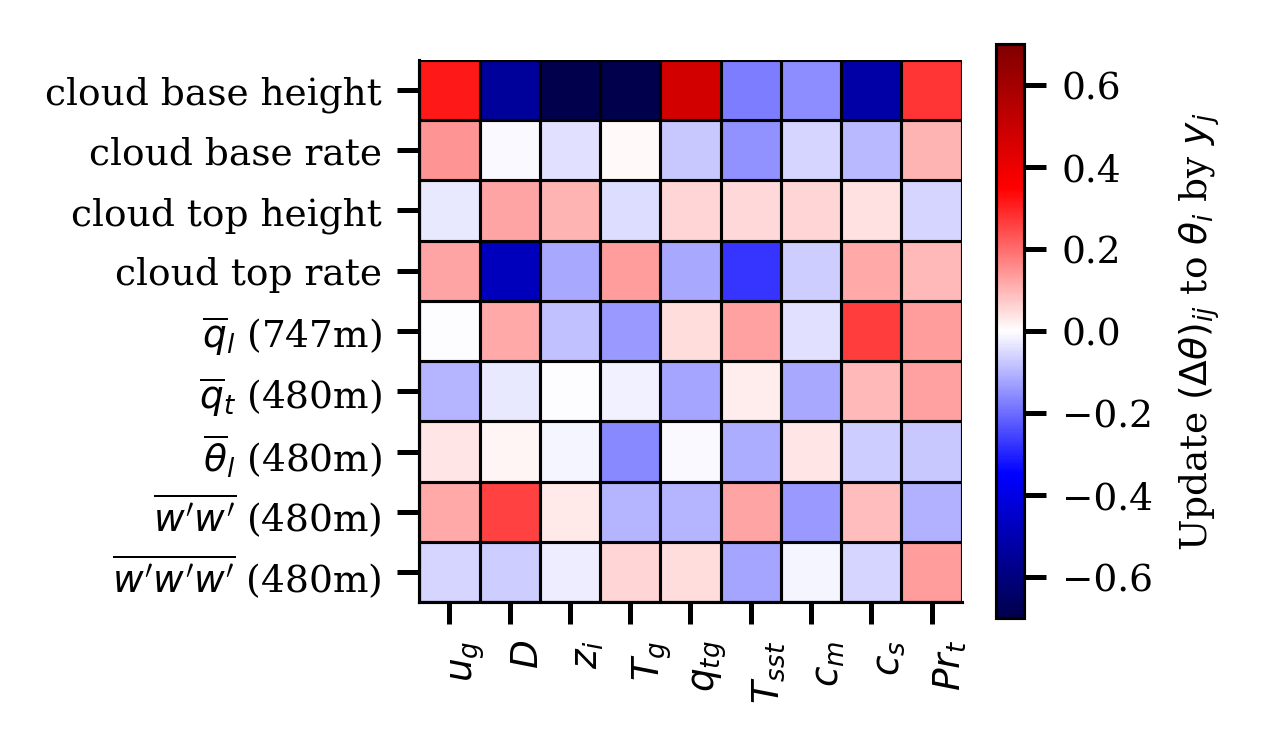

Saved figure  figs/MIXED_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__partial_updates


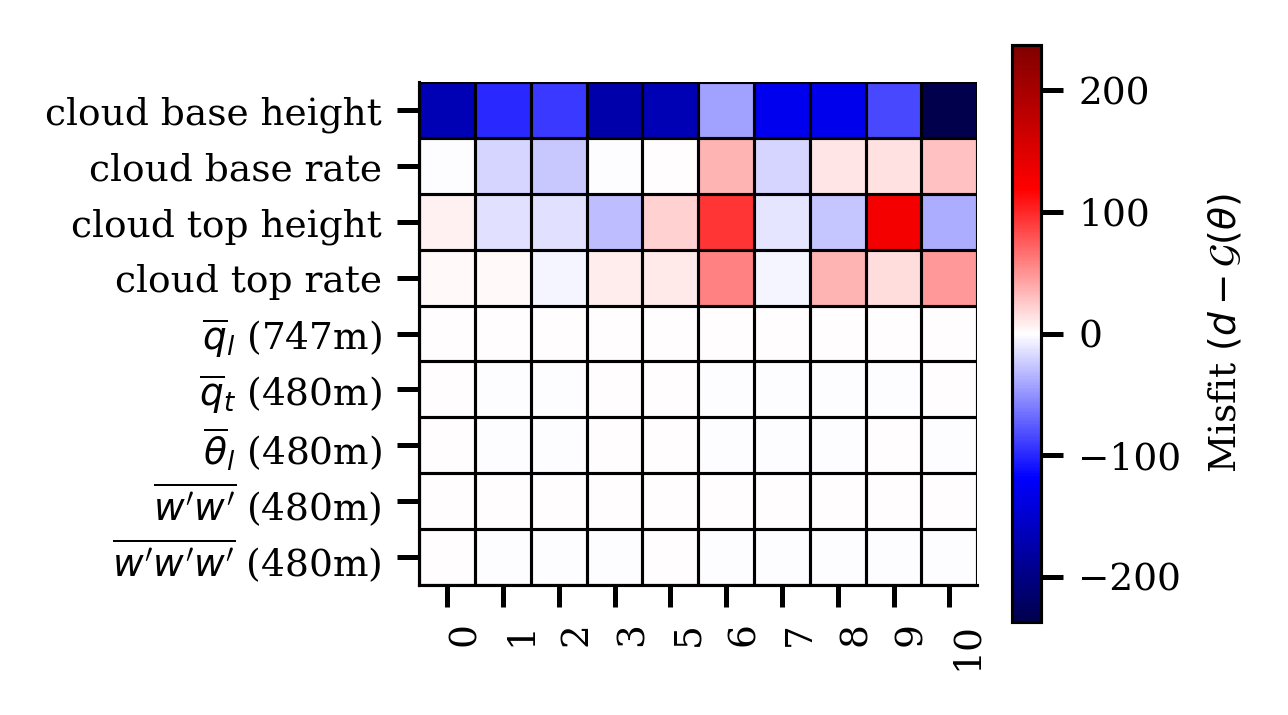

Saved figure  figs/MIXED_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__misfit


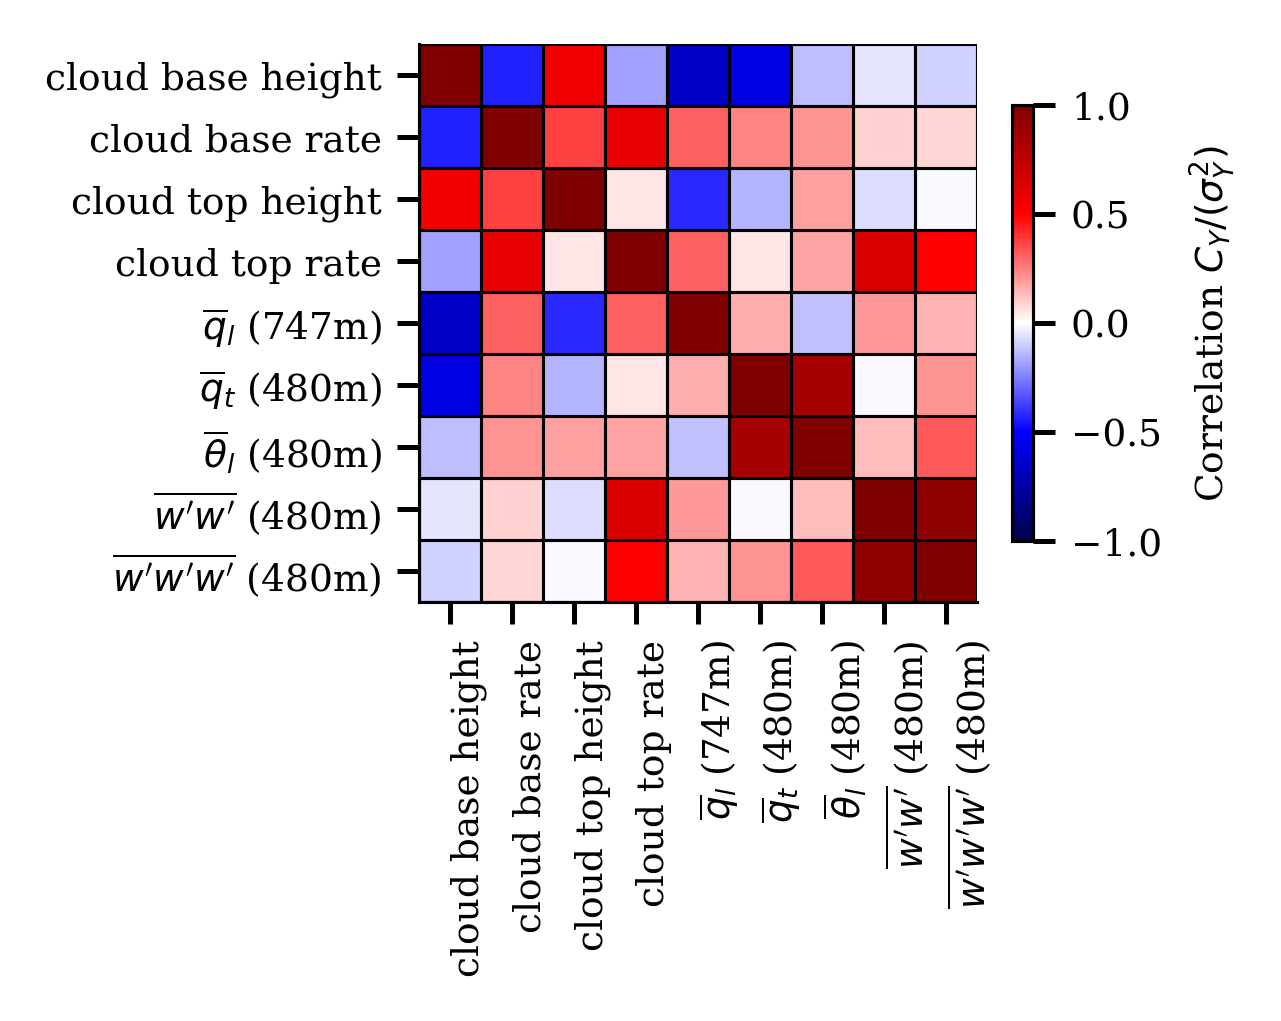

Saved figure  figs/MIXED_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__Corr_y


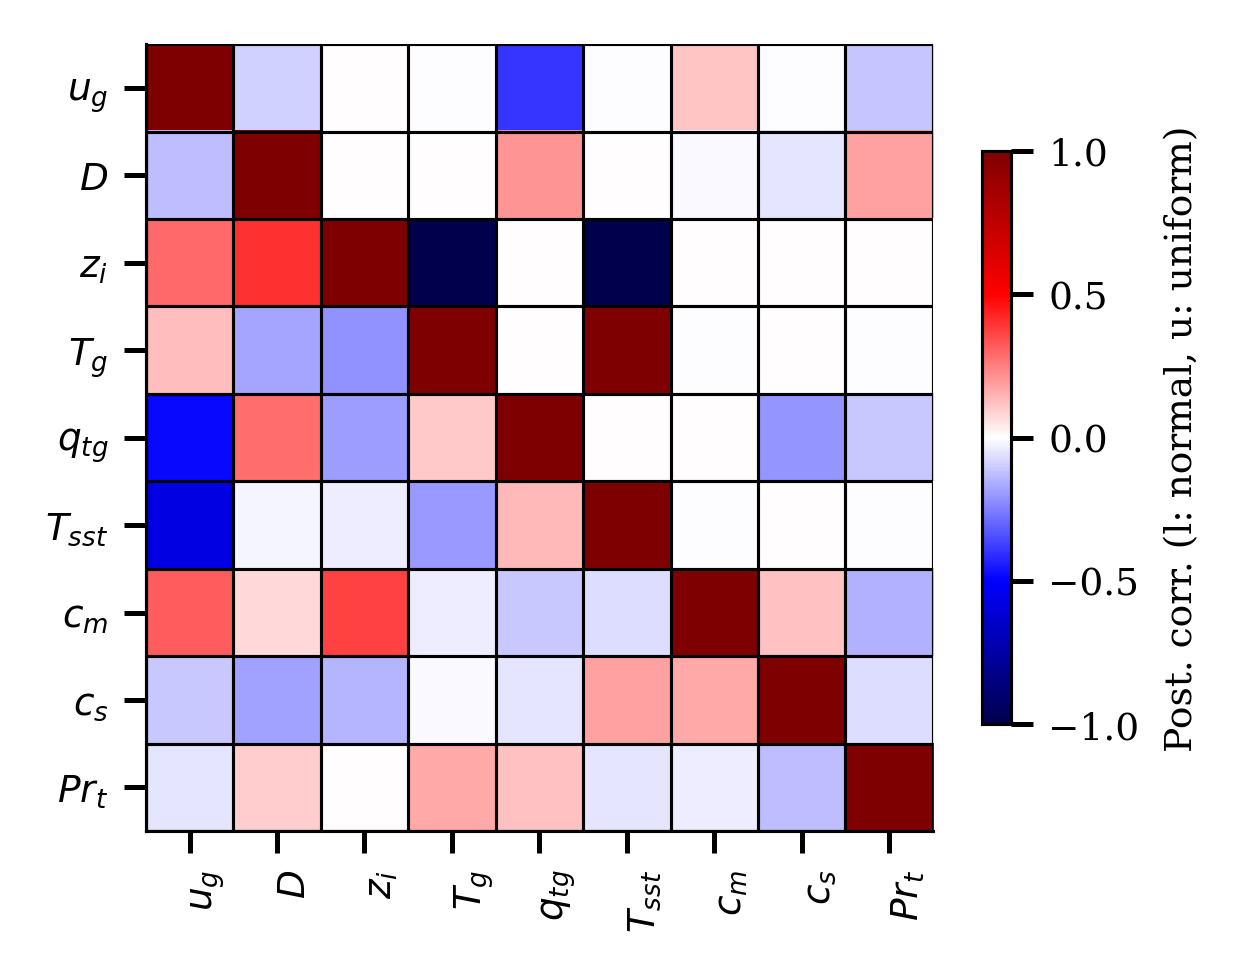

Saved figure  figs/MIXED_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__post_corr_transform
CENTRAL_FULLRES


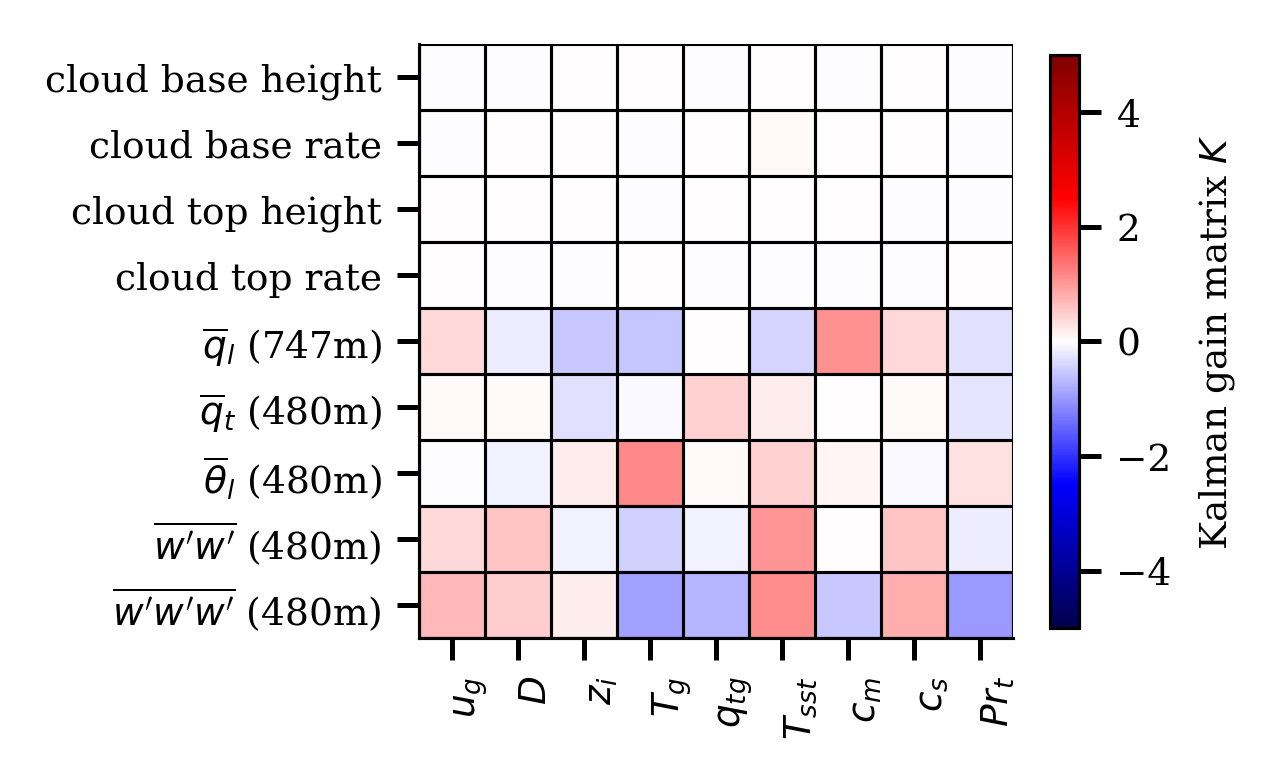

Saved figure  figs/CENTRAL_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__K


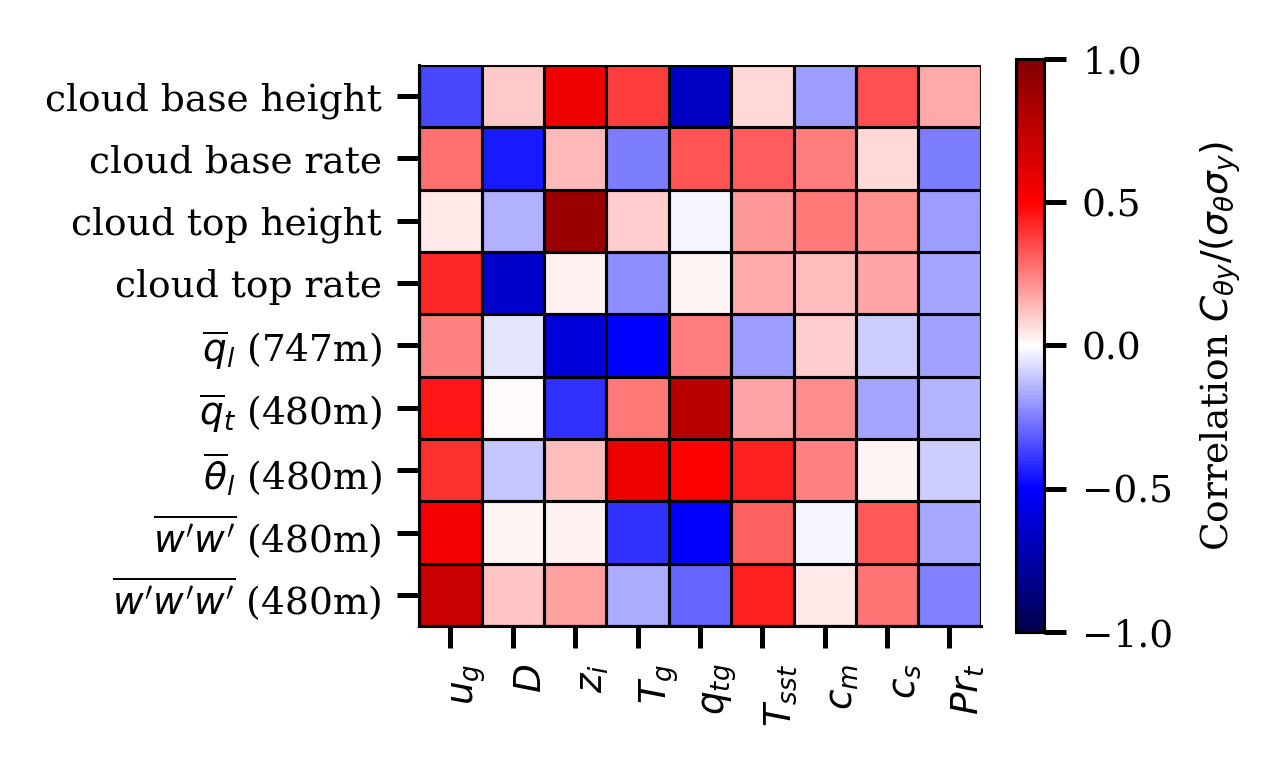

Saved figure  figs/CENTRAL_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__Corr_xy


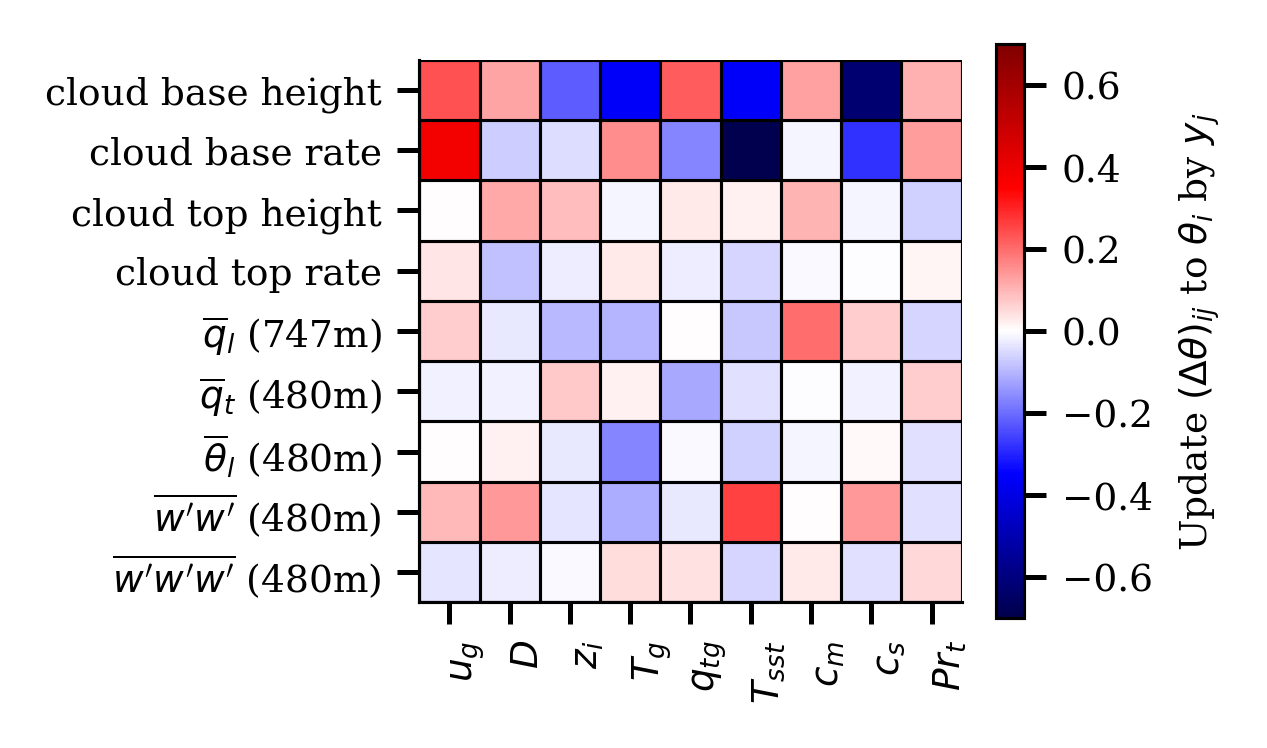

Saved figure  figs/CENTRAL_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__partial_updates


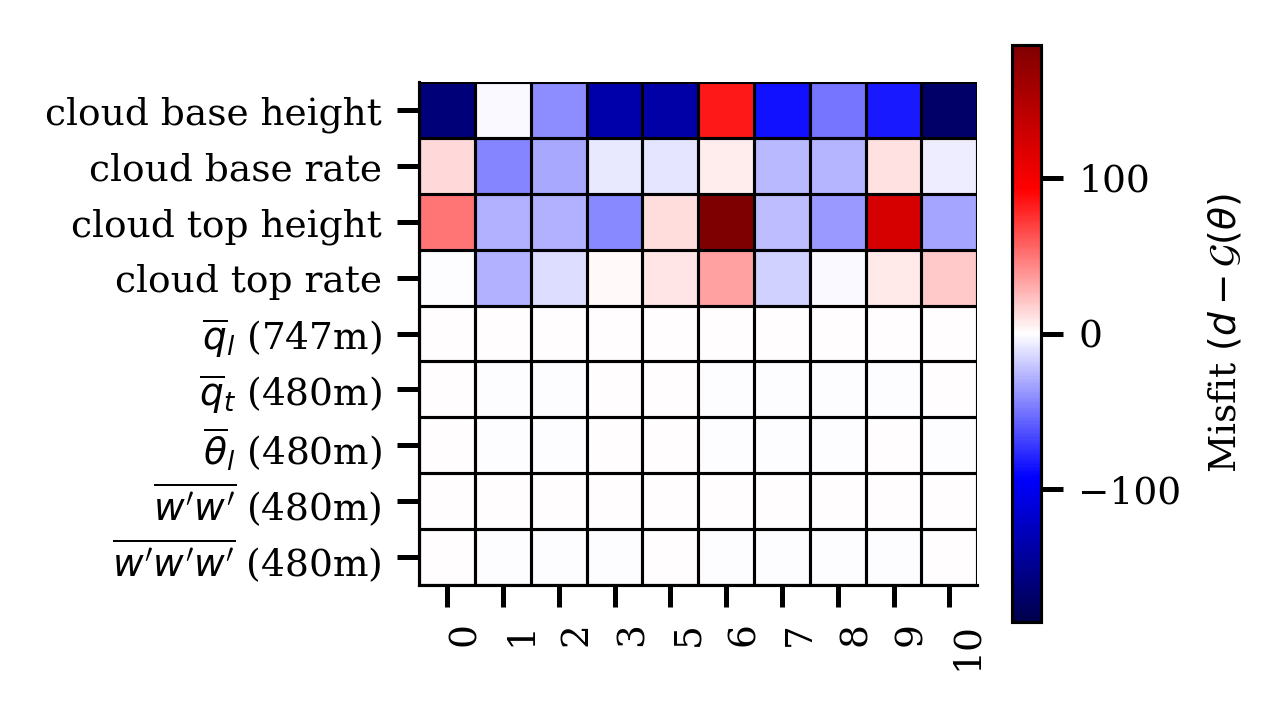

Saved figure  figs/CENTRAL_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__misfit


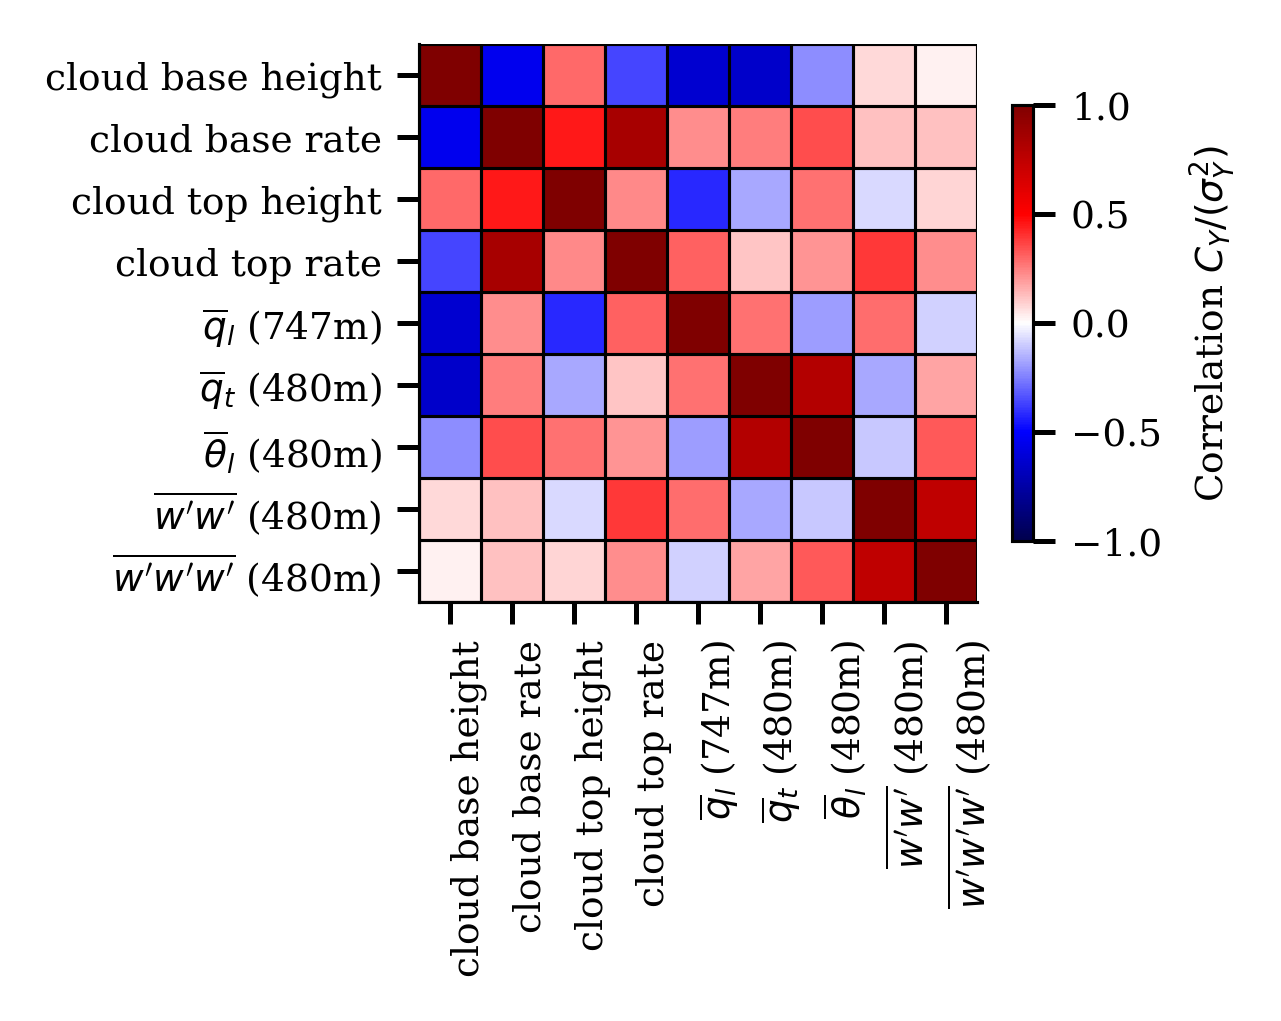

Saved figure  figs/CENTRAL_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__Corr_y


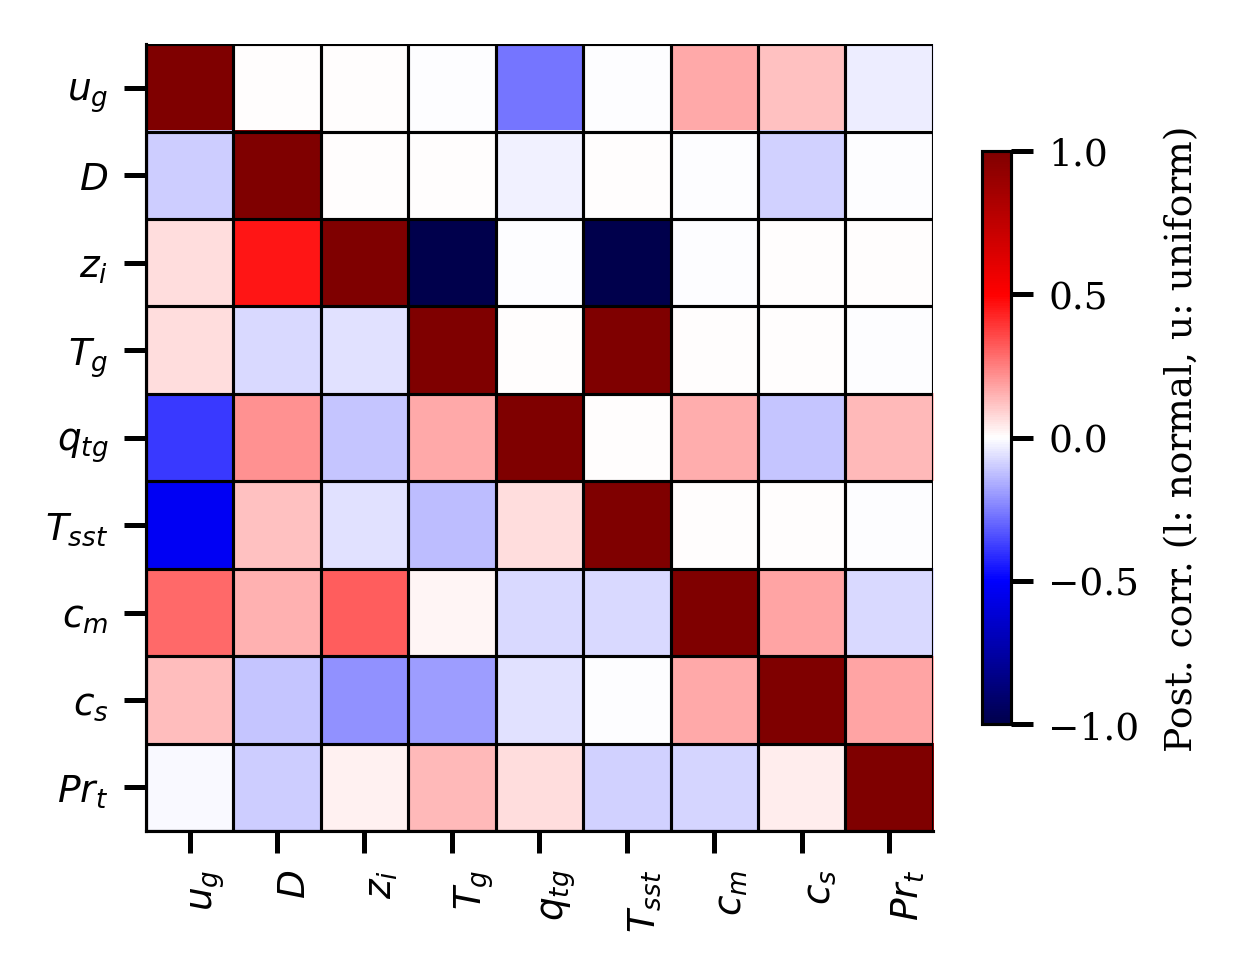

Saved figure  figs/CENTRAL_FULLRES/REAL_ZBASE-LOW-W//matrices_excerpts/fig-heatmap__post_corr_transform


In [12]:
for model_name in model_names:
    DA = DA_list[model_name]
    print(model_name)
    DA.plot_matrices(excerpt=True)

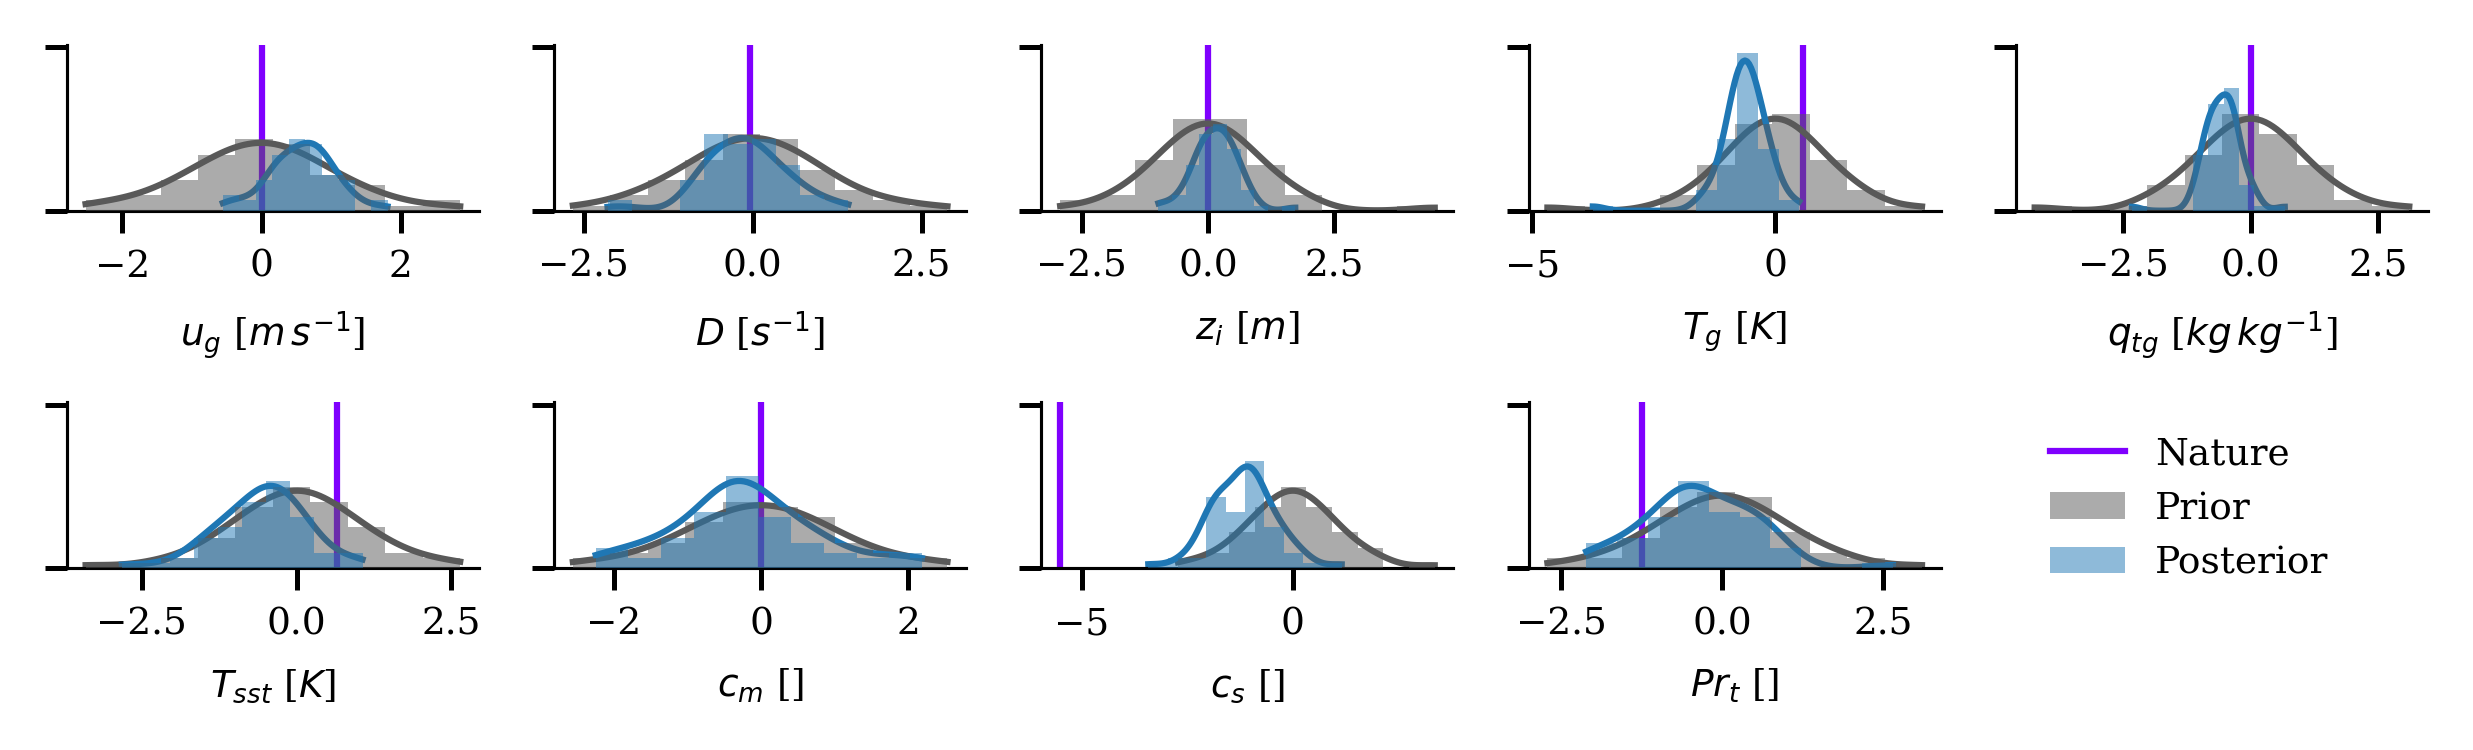

Saved figure  figs/WENO_FULLRES/REAL_ZBASE-LOW-W//fig-dist1d__unconstrained


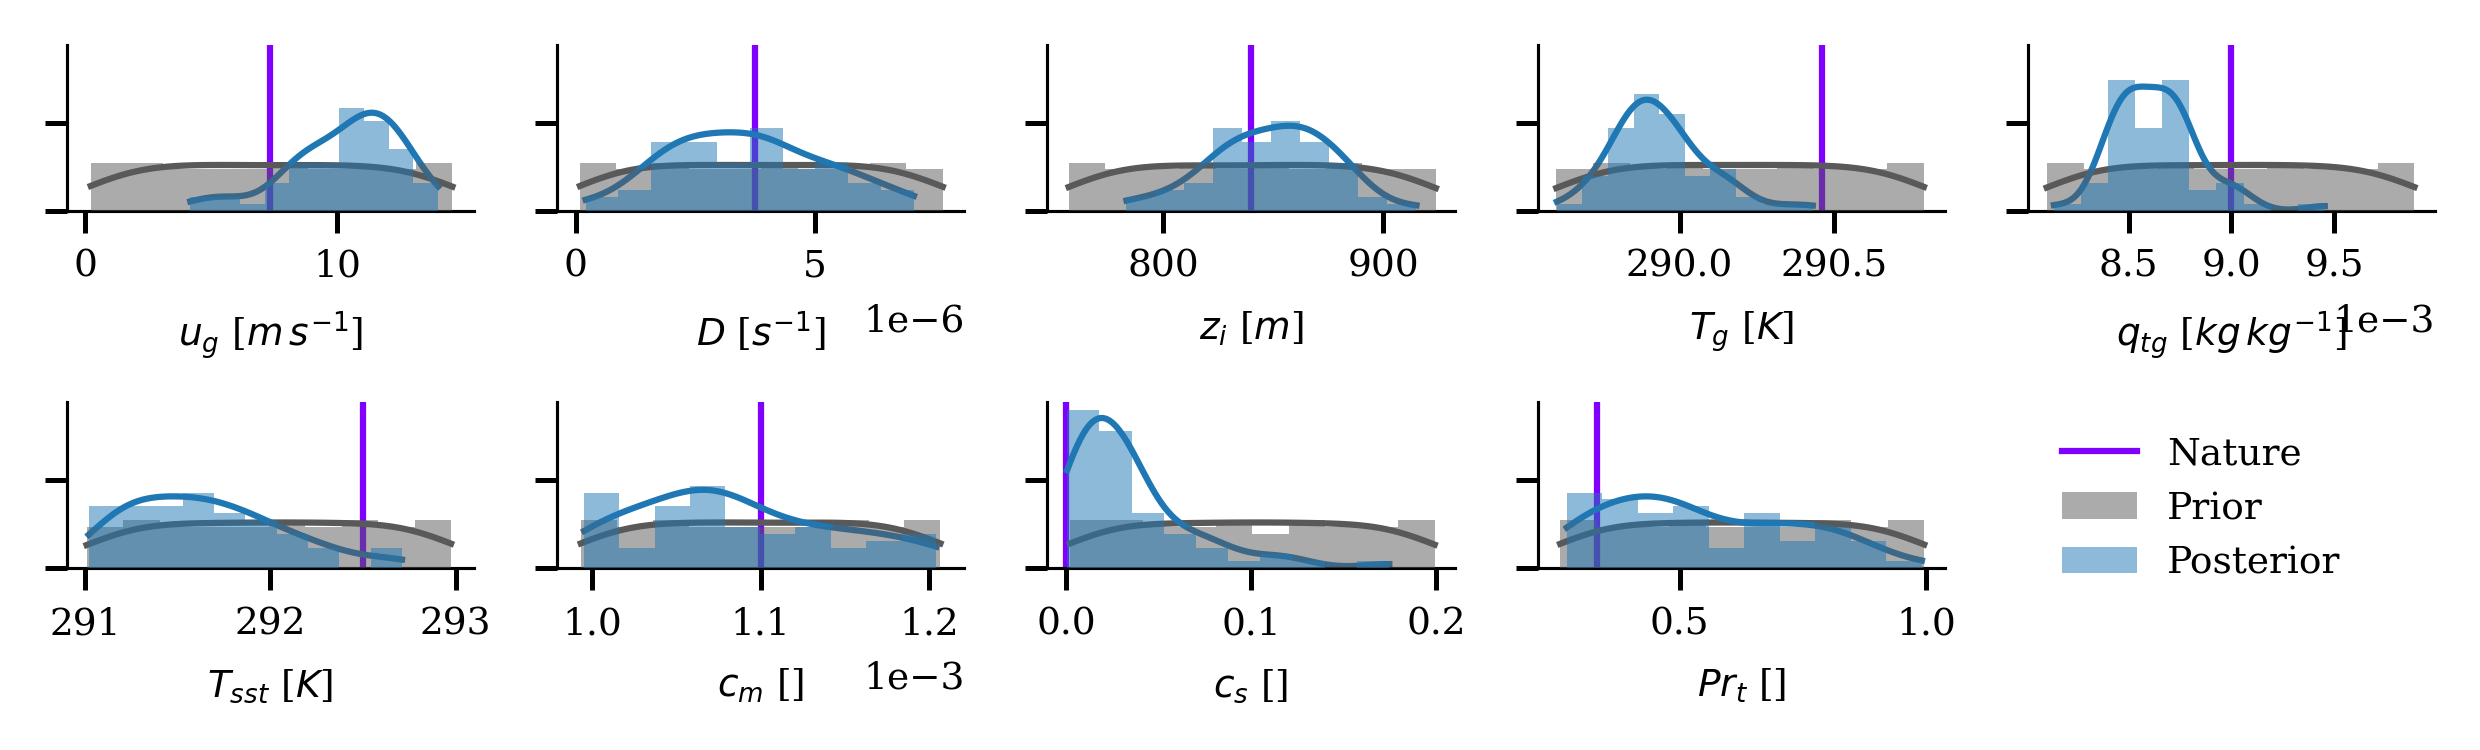

Saved figure  figs/WENO_FULLRES/REAL_ZBASE-LOW-W//fig-dist1d__constrained


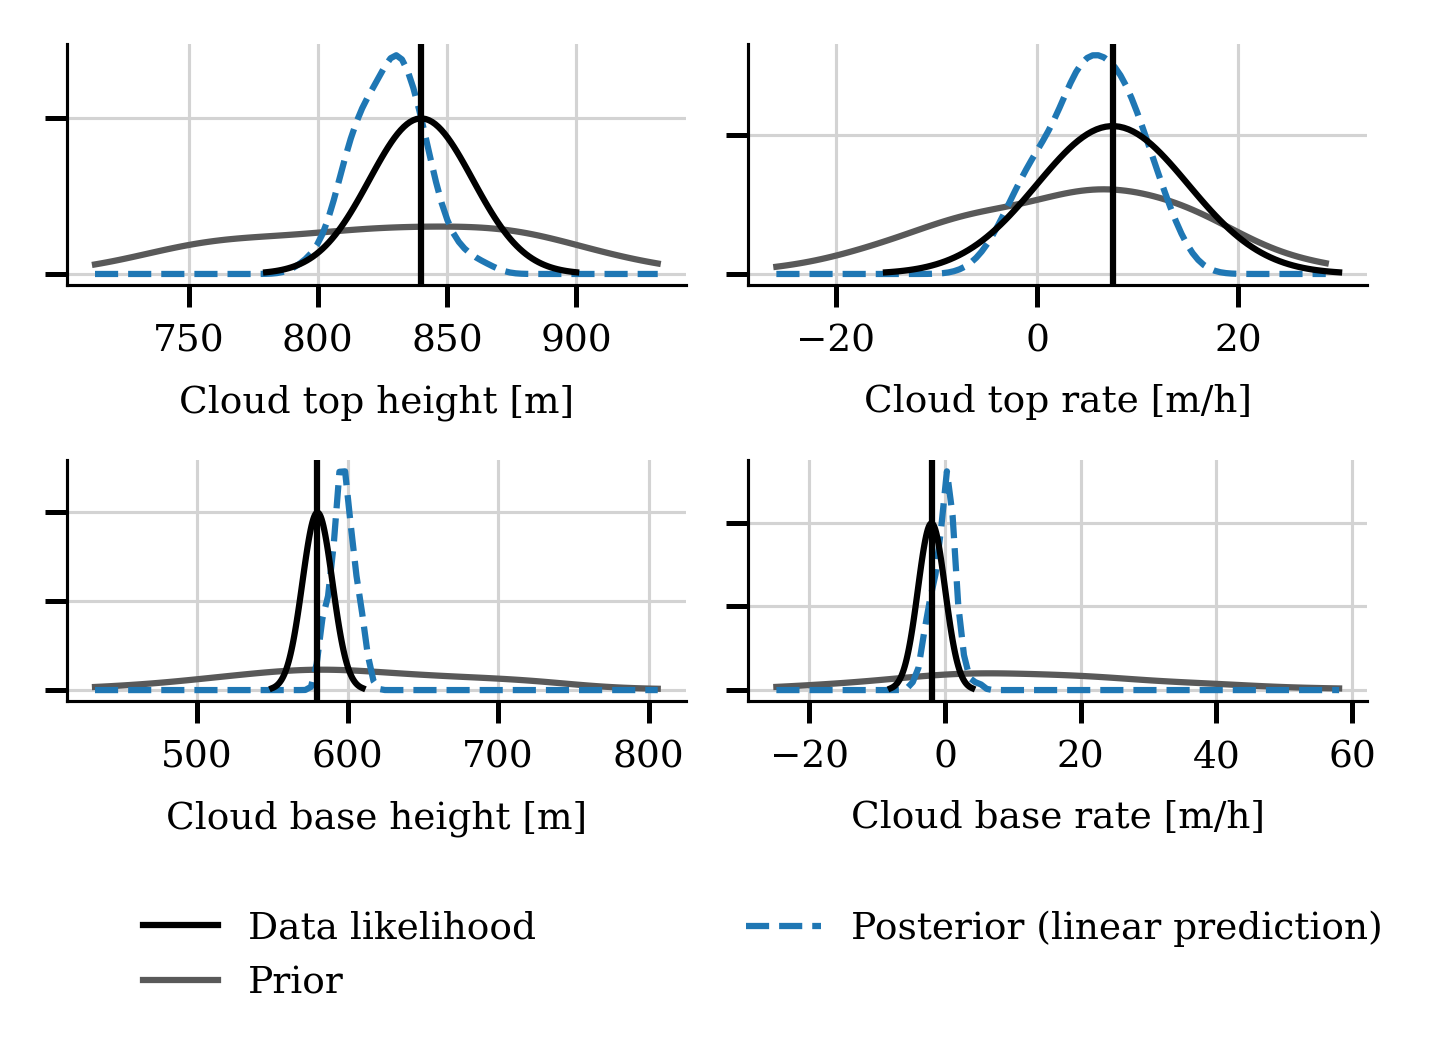

Saved figure  figs/WENO_FULLRES/REAL_ZBASE-LOW-W/fig-bayes-cloud-ts_prior_lh


In [9]:
from calpycles.plotting.bayes import plot_bayes_cloud_ts
import os

model_name = "WENO_FULLRES"

ens = ensembles[model_name]

# plot_ens_obs(
#     [ens],
#     ["Prior (N=64)"],
#     meas,
#     # nature=nature,
#     # nature_name="Nature",
#     save_file=os.path.join(DA.plot_folder, f"fig-obs_prior_{meas_name}_{model_name}"),
#     cloud_height_type="mean",
# )

DA = DAs[model_name]

DA.plot_1d_dists()

# DA.plot_matrices(excerpt=True)
# DA.plot_matrices(excerpt=False)

# posterior by linear prediction
Eo_post_pred = DA.analysis_observations()

plot_bayes_cloud_ts(
    Eo=DA.Eo,
    Eo_post_pred=Eo_post_pred,
    y=DA.y,
    hnoise=DA.hnoise,
    save_file=os.path.join(DA.plot_folder, "fig-bayes-cloud-ts_prior_lh"),
)

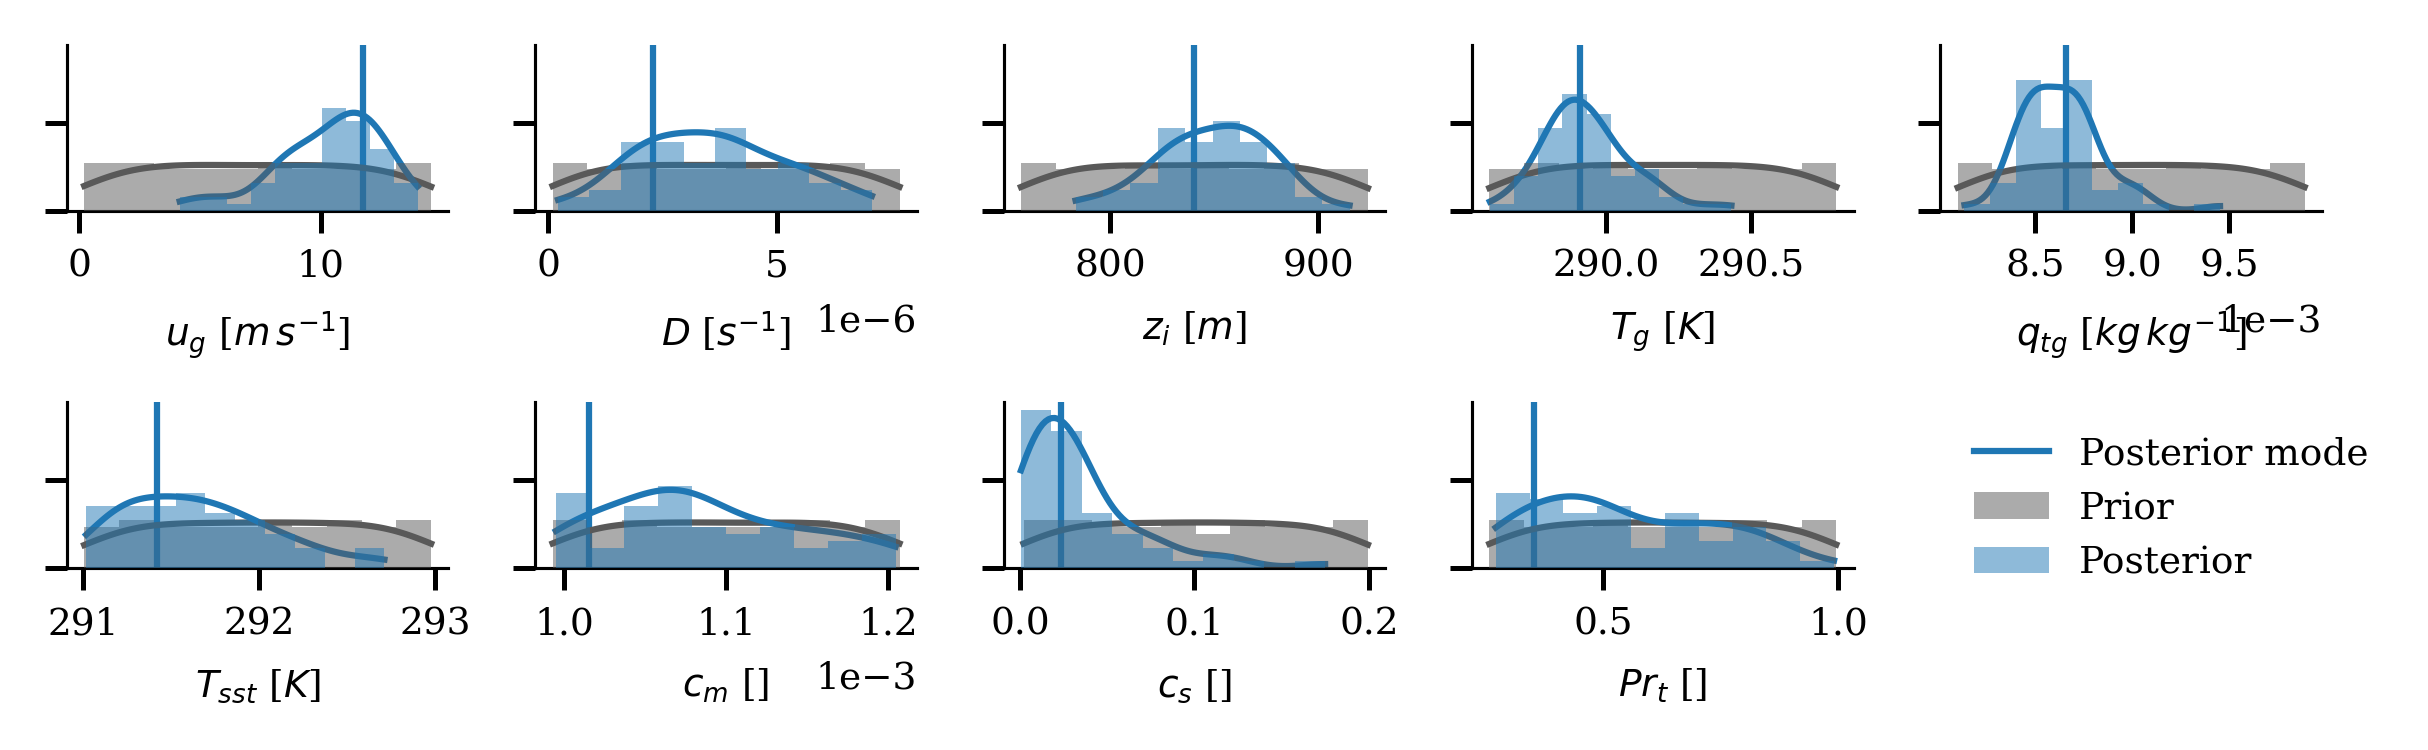

Saved figure  figs/WENO_FULLRES/REAL_ZBASE-LOW-W//fig-dist1d__mode
[1.17502303e+01 2.28222282e-06 8.40512667e+02 2.89913364e+02
 8.66016892e-03 2.91420039e+02 1.01522226e-03 2.34547799e-02
 3.53147295e-01]


In [10]:
E = DA.E
E_c = DA.to_constrained(DA.E)

E_new_c = DA.analysis(constrained=True)
mode_c = DA.get_posterior_mode(constrained=True)

from calpycles.plotting import COLORS

plot_samples_1d(
    [E_c, E_new_c],
    ["Prior", "Posterior"],
    nature_params=mode_c,
    nature_params_label="Posterior mode",
    c_nature=COLORS[1],
    # nature_params=nature_params_c,
    # nature_params_label="Nature",
    save_file=f"{DA.plot_folder}/fig-dist1d_{DA.name}_mode"
)

### add mode in addition to nature value ? Or plot not needed actually.

print(mode_c)

In [11]:
### run posterior mode sample

import os
from calpycles.pycles_sample import SampleDYCOMS_RF01
from data_loaders import make_namelist_settings


model_name = "WENO_FULLRES"
ens = ensembles[model_name]
DA = DAs[model_name]

mode_c = DA.get_posterior_mode(constrained=True)

# location
this_path = os.path.abspath("")
data_folder = os.path.join(this_path,"data/")
name = "mode" # sample name, same for all

sample = SampleDYCOMS_RF01(
    name=name,
    parent_path=os.path.join(data_folder, model_name, meas_name),
    namelist_settings=make_namelist_settings(model_name)
)

# set custom parameters
sample.parameters.set_from_np(mode_c)

sample.namelist.update({
    "mpi": {
        "nprocx": 64,  # takes about 3h on 64 cores
    }
})

sample.namelist.write()

sample.run(
    submit_job= True,
    do_wait_to_finish = False,  # cant do cleaning!
)

### RUNNING

Submitted batch job 52491315


In [ ]:
# after running, finish up
from data_loaders import load_mode

model_name = "WENO_FULLRES"
meas_name = "ZBASE"

mode = load_mode(model_name,meas_name=meas_name)
mode.clean_files(**{
        # for nature, keep all information
        "delete_fields": False,
        "select_stats": False,
        "delete_cond_stats": False,
})
mode.observable.observe()

Cleaning sample files of mode...
Reading full profiles and timeseries for ObEnsembleDYCOMS_RF01...
	[create_mfdataset_with_nans()] Found 1 files.


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


	[create_mfdataset_with_nans()] Found 1 files.
Saved observation(s) 'mode' to ./data/WENO_FULLRES/ZBASE-LOW-W/mode/samples_observations.nc.


Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.
Reading full profiles and timeseries for ObEnsembleDYCOMS_RF01...
	[create_mfdataset_with_nans()] Found 1 files.


/cluster/work/climate/dgrund/git/dana-grund/CalPyCLES/environment/.venv/calpycles/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


	[create_mfdataset_with_nans()] Found 1 files.


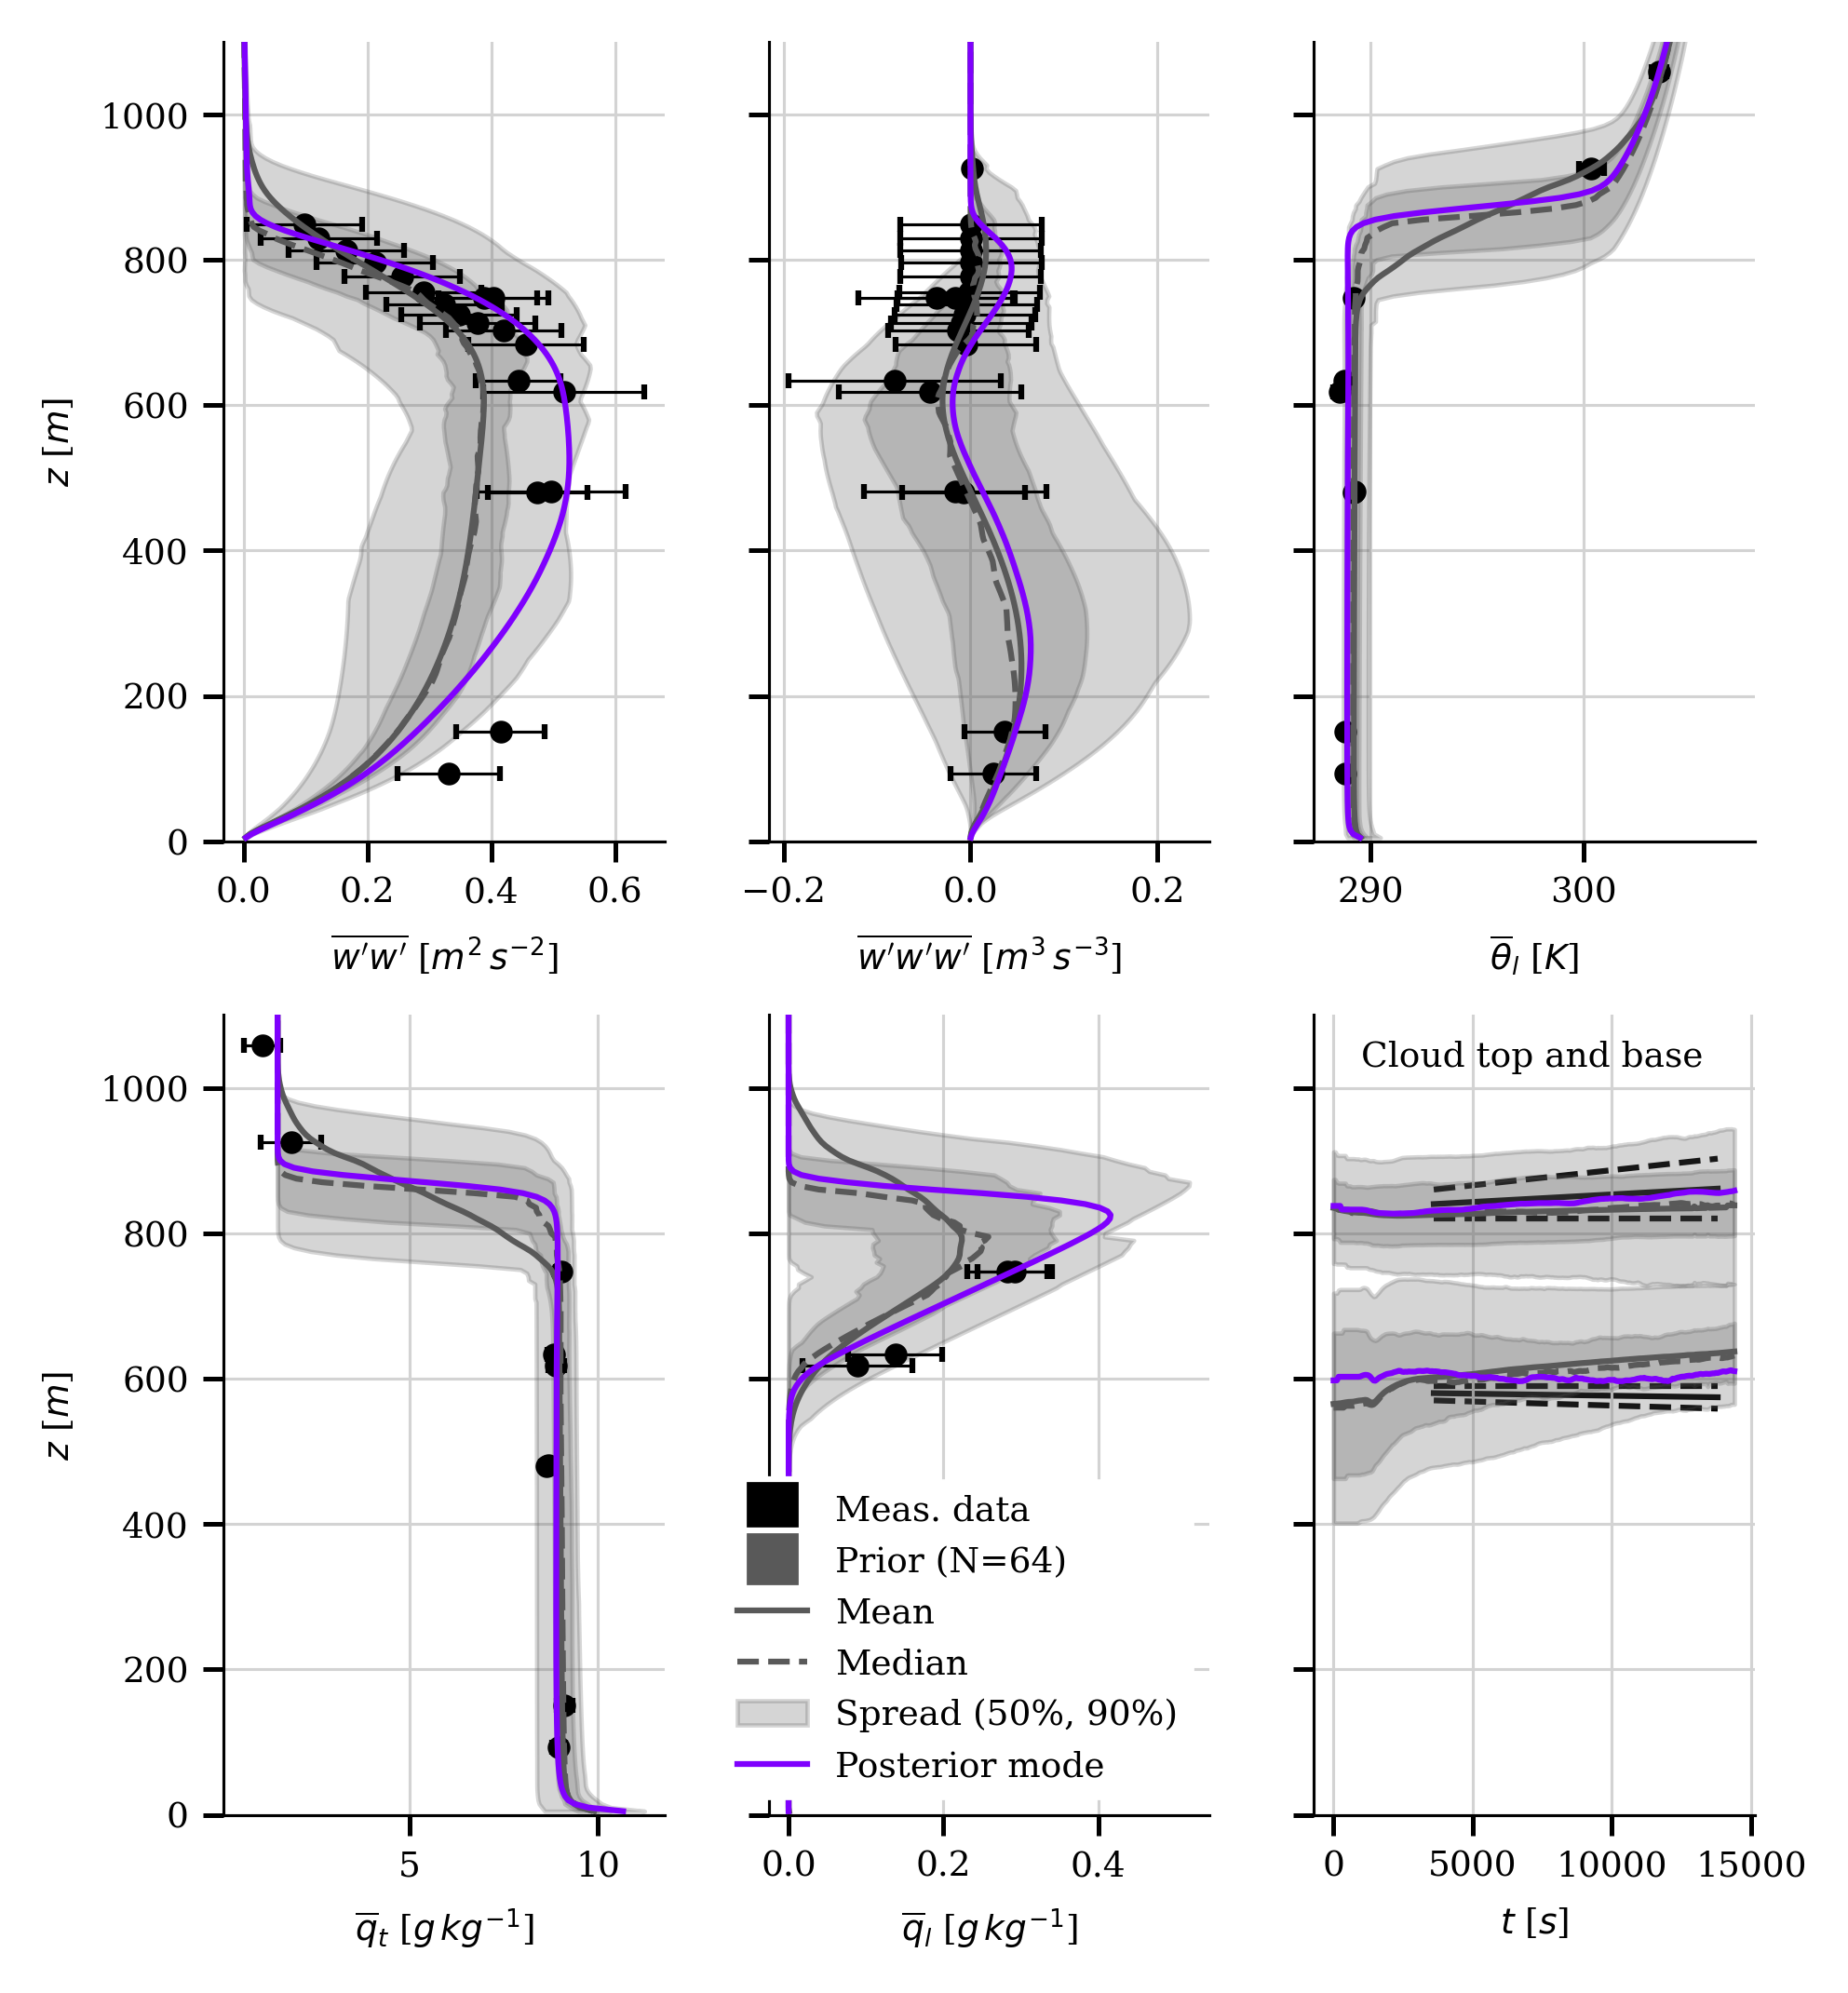

Saved figure  figs/WENO_FULLRES/ZBASE-LOW-W/fig-obs_prior_WENO_FULLRES_mode


In [ ]:
### TO DO: ADD NATURE AS WELL
model_name = "WENO_FULLRES"

# modified measurements from above
meas_name = "ZBASE"

from data_loaders import load_mode
mode = load_mode(model_name,meas_name=meas_name)

from data_loaders import load_ens 
ens = load_ens(model_name)

from calpycles.plotting.ens_obs import plot_ens_obs
plot_ens_obs(
    ensembles=[ens],
    ens_labels=["Prior (N=64)"],
    dtaa=meas,
    nature=mode,
    nature_name="Posterior mode",
    save_file=f"figs/{model_name}/{meas_name}/fig-obs_prior_{model_name}_mode",
    cloud_height_type="mean",
)